<a name="outline"></a>

## Outline

- [Task 1](#task-1): Regression
  - [1.1](#q11) Linear regression
  - [1.2](#q12) Ridge regression
  - [1.3](#q13) Relaxation of Lasso regression
- [Task 2](#task-2): Classification
  - [2.1](#q21) kNN classifier
  - [2.2](#q22) Random forest 
  - [2.3](#q23) Support vector machine (SVM) 
- [Task 3](#task-3): Mastery component 
  - [3.1](#q31) Logistic regression and bagging 
  - [3.2](#q32) Kernelised SVM classifier 

<a name="task-1"></a>
# Task 1: Regression [^](#outline)



<a name="q11"></a>

## 1.1  [^](#outline)



1.1.1

I have imported the data from chemistry samples and analysed it to make sure it is complete and ready for analysis, and doesn't need to be altered or cleaned. I then standardised the data and implemented linear regression. I then implemented augmented linear regression. I then implemented the R2 score and worked it out for both linear regression models on the training data.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

In [13]:
chemistry_samples.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3,LC50
0,3.661280,0.658363,1.602232,1.994272,0.836488,3.153623,15.893033,-27.724370,0.059355,0.756698,5.506249
1,3.936362,1.154287,1.146997,0.904295,2.948308,5.141095,13.590177,-31.821521,-13.408855,1.161298,6.636791
2,0.964144,0.415485,1.481028,2.136585,0.043679,-1.156783,15.989419,-3.699312,2.561525,0.500115,1.563388
3,2.074617,1.417296,0.486216,0.000908,-0.066980,2.610960,7.962046,-16.374439,2.448975,1.481888,6.248432
4,1.448569,0.836892,1.951012,0.028318,-0.039121,1.851095,22.285266,-9.526361,2.870400,0.649234,3.676796


In [14]:
chemistry_samples.dtypes

CIC0         float64
SM1_Dz(Z)    float64
GATS1i       float64
NdsCH        float64
NdssC        float64
MLOGP        float64
FV1          float64
VFV          float64
FV2          float64
FV3          float64
LC50         float64
dtype: object

In [15]:
chemistry_samples.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3,LC50
count,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,2.907930,0.635057,1.295748,0.449253,0.540840,2.093087,15.057563,-22.111122,0.302976,0.637047,4.139930
std,0.782757,0.427101,0.396828,0.697176,0.940516,1.447468,3.539621,7.110208,5.239923,0.459752,1.206448
min,0.508140,0.000209,0.289772,0.000158,-0.600682,-3.505785,4.715537,-50.284071,-35.369667,-0.162048,0.124518
25%,2.324115,0.286364,0.965427,0.054057,-0.056750,1.141446,12.342002,-26.996891,-1.033571,0.285723,3.348342
50%,2.918325,0.560186,1.261636,0.122348,0.116859,2.064408,14.707910,-22.326363,2.361851,0.536016,4.083925
75%,3.438485,0.900059,1.556928,0.860789,0.978137,3.022278,17.391135,-16.808405,3.287077,0.890875,4.901910
max,6.286216,2.221232,2.950545,4.295030,6.328623,6.845000,31.153722,0.038877,5.981860,3.447559,8.751823


In [16]:
chemistry_samples.shape

(4111, 11)

From this analysis on the train data, we can firstly see that all the variables given are floats, which means that we are going to dealing with a regresison problem, and also there is no need for cleaning the data of missing data as all columns contain the maximum number of entries. However, one thing I can see from the description of each column, is that there is a big difference in scale down each column. This means that the means and variances of each column can vary by quite a vast difference. A quick overview would see that the minimum mean is -22.111122, but the maximum mean is 15.057563. This can also be done for the variances by looking at the standard deviation, as variance is just the standard deviation squared. The minimum standard deviation being 0.396828 with the maximum standard deviation being 7.110208. 

When looking to fit a regression model it is useful to standardize the X data, as this puts all the variables on the same scale, but also reduces multicollinearity of the variables. This is very important when predicting $\beta$ coefficients, because if two or more X variables are highly correlated, then it is very difficult to get an accurate linear regression model that matches the beta coefficients to match the correlation between the variable and the y variable. We can also reduce the multicollinarity of the X variables by implementing a penalty term, like ridge or lasso, but that is not needed in the linear regression model. The reason, we want to reduce multicollinerity in the linear regression model is then it will make our $X^TX$ more invertible, meaning that it will have distinct columns that arn't collinear. This means that the $\beta$ it finds will be optimal unique solution. 

This being said, from now on, I will experiemnt with the normal data, but for my actual predictions, I will standardize te data for all the regression models, and for any further data where the means and standard deviations differ by a vast amount.

In [962]:
def max_lik_estimate(X, y):
    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    
    N, D = X.shape
    beta_ml = np.linalg.solve(X.T @ X, X.T @ y)
    return beta_ml


def predict_with_estimate(X_test, beta):
    
    # X_test: K x D matrix of test inputs
    # beta: D x 1 vector of parameters
    # returns: prediction of f(X_test); K x 1 vector
    
    prediction = X_test @ beta
    
    return prediction 


def standardise_train(X, mu, sigma):
    
    # X: K x D matrix of test inputs
    # mu: D x 1 vector of parameters
    # sigma: D x 1 vector of parameters
    # returns: standardized X (K x D)
    
    X_std = (X - mu) / sigma
    return X_std


def train_mu(X):
    
    # X: K x D matrix of test inputs
    # returns: mean of columns of X (D x 1)
    
    return np.mean(X, axis = 0)


def train_sigma(X):
    
    # X: K x D matrix of test inputs
    # returns: standard deviation of columns of X (D x 1)
    
    return np.std(X, axis = 0)


def r2_score(y_test, y_pred):
    
    # y_test: N x 1 vector of actual values
    # y_pred: N x 1 vector of predicted values
    # returns: r2 score of the predictions
    
    numerator = np.sum((np.squeeze(y_test)-np.squeeze(y_pred))**2)
    y_avg = np.mean(y_test)
    denominator = np.sum((y_test-y_avg)**2)
    
    return 1 - numerator/denominator

In [980]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# define the train set
chem_train_unstd = chemistry_samples.iloc[:, :-1].values

# define the train target values
chem_train_y = chemistry_samples.iloc[:, -1].values

# create a standardised numpy array
mu = train_mu(chem_train_unstd)
sigma = train_sigma(chem_train_unstd)
chem_train = standardise_train(chem_train_unstd, mu, sigma)

# work out the maximum likelihood estimates
chem_train_beta_ml = max_lik_estimate(chem_train, chem_train_y)

# predict the function values at the test points using the maximum likelihood estimator
chem_train_ml_prediction_y = predict_with_estimate(chem_train, chem_train_beta_ml)
print(r'Linear Regression Train R2 score:', r2_score(chem_train_y, chem_train_ml_prediction_y))

Linear Regression Train R2 score: -10.906256138358414


When applying the linear regression on the standardised data, the returned R2 score is negative. This can at first appear strange, but is easily explained by the realisation of what this model is trying to predict. As the data is standardized, when applying linear regression it will have no y intercept, and such when visualised on a graph, will have a y intercept of 0, this can be seen by finding the mean of the y_predicted values. It will be 0, but from the description of the LC50 column, the mean is 4.14, and such this model will then model a regression that has the least squares prediction but will on average be 4.14 off on each prediction. How R2 score works, is that a model of a horizontal line at the mean of y, will give a score of 0. And such any model worse than that will give a negative result. So the model is worse than the mean, and such shows that it is neccessary to include the y intercept in the linear regression. I will implement the augmented linear regression to show viable results.

In [22]:
def max_lik_estimate_aug(X_aug, y):
    
    # X_aug: N x D+1 matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D+1 x 1)
    
    beta_aug_ml = max_lik_estimate(X_aug, y)
    
    return beta_aug_ml

In [981]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# define the train set
chem_train_unstd = chemistry_samples.iloc[:, :-1].values

# define the train target values
chem_train_y = chemistry_samples.iloc[:, -1].values

# create a standardised numpy array
mu = train_mu(chem_train_unstd)
sigma = train_sigma(chem_train_unstd)
chem_train = standardise_train(chem_train_unstd, mu, sigma)

# define the augmented train set 
chem_train_aug = np.hstack([np.ones((chem_train.shape[0],1)), chem_train])

# work out the augmented maximum likelihood estimates
chem_train_aug_beta_ml = max_lik_estimate_aug(chem_train_aug, chem_train_y)

# predict the function values at the test points using the augmented maximum likelihood estimator
chem_train_aug_ml_prediction_y = predict_with_estimate(chem_train_aug, chem_train_aug_beta_ml)

print(r'Augmented Linear Regression Train R2 score:', r2_score(chem_train_y, chem_train_aug_ml_prediction_y))

Augmented Linear Regression Train R2 score: 0.8718259975718016


In [983]:
headers = ['Intercept'] + list(chemistry_samples.columns[:-1].values) + ['R2 score']
data = [[0] + list(chem_train_beta_ml) + [r2_score(chem_train_y, chem_train_ml_prediction_y)],
list(chem_train_aug_beta_ml) + [r2_score(chem_train_y, chem_train_aug_ml_prediction_y)]]
rows = ['Linear Regression', 'Augmented Linear Regression']
pd.DataFrame(data, index=rows, columns=headers)

,Intercept,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3,R2 score
Linear Regression,0.00000,0.034996,0.537535,-0.015081,0.253095,0.004387,0.565182,-0.264034,-0.253853,-0.079945,-0.000829,-10.906256
Augmented Linear Regression,4.13993,0.034996,0.537535,-0.015081,0.253095,0.004387,0.565182,-0.264034,-0.253853,-0.079945,-0.000829,0.871826


Now we can see that a reasonable R2 score has been given. This is much better than the negative score before. I have compared the $\beta$ coefficents above in a table. As i previously mentioned, now that the intercept $\beta$ variable is added, it is set to equal the mean of the y's. From looking at the table, I can see that all the other $\beta$ coefficients are the same, and therefore shows how important the intercept is in getting a good fit for the model. 

As the data is now standardised also, we can also comment on which variables are most important for the correlation of the final y prediction. The highest magnitude of $\beta$ coefficent is the SM1_Dz(Z) with a value of 0.538. This shows that this variable is the most correlated to the final LC50 variable. We can also see which values are a lot less correlated, with the smallest magnitude of -0.000829 from the FV3 $\beta$ coefficient. For a visual represetation of correlation, I can explain it to be, because all the variables are normalised, variables with a larger magnitude $\beta$ coeffcients, will change the final prediction by more than lesser magnitude $\beta$ coeffcients, and because of this will be easier to understand the dominant variables in the prediction. Of course, if a $\beta$ coeffcient is close to 0, then no matter what value it is, it will result in a very small change in the final y.

As for the R2 score for the augmented linear regression, 0.871826 is a very high score. This means that 87 percent of the variance in the training set is accounted for in this model. This means that maximum likelihood creates a very accurate representation of the training data. This is expected from linear regression because by definition is an unbiased estimate, and such is prone to overfitting, and such means when testing on the same training data, it is prone to doing much better than it would if tested on unseen data.

1.1.2

I read in the new test data from chemistry test file. I perform the same analysis as before. I then standardise the data using the same parameters as the train data to give consistency. I then compute the R2 score for the test data on both linear models I have made, and then compare the differences between the two models and the scores between the train and test data.

In [27]:
# load data as pandas data frames
chemistry_test = pd.read_csv('chemistry_test.csv')

In [28]:
chemistry_test.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3,LC50
0,1.617579,0.376167,1.224281,0.849464,1.101738,-0.448372,14.913614,-9.091450,-1.953849,0.328298,1.791786
1,4.278766,0.514788,1.259734,0.210436,0.819626,4.446118,12.904817,-37.986185,-2.804426,0.452758,6.125609
2,3.578652,0.221018,1.552583,1.007153,-0.013073,1.960720,17.393050,-27.188863,3.565159,0.341665,3.953270
3,3.021762,1.602774,1.044233,0.054776,2.060890,4.510903,12.777434,-22.710306,-7.966119,1.729511,6.995314
4,2.487163,0.799948,1.005727,0.094923,0.146542,2.298082,13.336721,-16.839870,2.607198,0.904353,5.253633


In [29]:
chemistry_test.dtypes

CIC0         float64
SM1_Dz(Z)    float64
GATS1i       float64
NdsCH        float64
NdssC        float64
MLOGP        float64
FV1          float64
VFV          float64
FV2          float64
FV3          float64
LC50         float64
dtype: object

In [30]:
chemistry_test.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3,LC50
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,2.861501,0.631125,1.269849,0.455870,0.494666,2.068875,14.818163,-21.742714,0.584122,0.632418,4.120735
std,0.774397,0.418012,0.382645,0.719690,0.911657,1.450723,3.494455,7.160118,4.700937,0.450990,1.175629
min,0.647476,0.003592,0.202975,0.000323,-0.540236,-2.441058,5.395300,-49.146675,-26.198937,-0.195405,1.161957
25%,2.273664,0.286499,0.967198,0.053715,-0.068329,1.159844,12.140332,-26.549683,-0.594728,0.271490,3.303218
50%,2.897980,0.554753,1.222545,0.124618,0.108270,2.088124,14.471913,-21.912708,2.503755,0.533540,4.110352
75%,3.411725,0.903278,1.523901,0.871427,0.932910,2.978749,16.934890,-16.346515,3.353090,0.898143,4.822600
max,5.801678,2.013109,2.699048,4.342691,6.129559,6.679374,28.259679,0.681013,5.618493,2.105268,8.068737


In [31]:
chemistry_test.shape

(1028, 11)

This analysis of the test file is the same as before and is simply just to make sure that the same format as before is kept, like no variables are smapped positions, as this will need to be aligned with the train data to get an appropriate regression, and also no cleaning is needed, like we checked in the training data. The results are similar to before which means that it should be a good data set to get an idea of how well our model will work on unseen data.

In [992]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# define the train set
chem_train_unstd = chemistry_samples.iloc[:, :-1].values

# create a standardised numpy array
mu = train_mu(chem_train_unstd)
sigma = train_sigma(chem_train_unstd)
chem_train = standardise_train(chem_train_unstd, mu, sigma)

# work out the augmented maximum likelihood estimates
chem_train_beta_ml = max_lik_estimate(chem_train, chem_train_y)

# load data as pandas data frames
chemistry_test = pd.read_csv('chemistry_test.csv')

# convert from data frame to numpy array
chem_test_unstd = chemistry_test.iloc[:, :-1].values

# create a standardised numpy array
chem_test = standardise_train(chem_test_unstd, mu, sigma)

# define the test target values
chem_test_y = chemistry_test.iloc[:, -1].values

# predict the function values at the test points using the maximum likelihood estimator
chem_test_ml_prediction_y = predict_with_estimate(chem_test, chem_train_beta_ml)

print(r'Linear Regression Test R2 score:', r2_score(chem_test_y, chem_test_ml_prediction_y))

Linear Regression Test R2 score: -11.510611751777764


In [995]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# define the train set
chem_train_unstd = chemistry_samples.iloc[:, :-1].values

# calculate the standardisation mu and sigma to use on the test data
mu = train_mu(chem_train_unstd)
sigma = train_sigma(chem_train_unstd)
chem_train = standardise_train(chem_train_unstd, mu, sigma)

# define the augmented test set 
chem_train_aug = np.hstack([np.ones((chem_train.shape[0],1)), chem_train])

# work out the augmented maximum likelihood estimates
chem_train_aug_beta_ml = max_lik_estimate(chem_train_aug, chem_train_y)

# load data as pandas data frames
chemistry_test = pd.read_csv('chemistry_test.csv')

# convert from data frame to numpy array
chem_test_unstd = chemistry_test.iloc[:, :-1].values

# create a standardised numpy array
chem_test = standardise_train(chem_test_unstd, mu, sigma)

# define the augmented test set 
chem_test_aug = np.hstack([np.ones((chem_test.shape[0],1)), chem_test])

# define the test target values
chem_test_y = chemistry_test.iloc[:, -1].values

# predict the function values at the test points using the augmented maximum likelihood estimator
chem_test_aug_ml_prediction_y = predict_with_estimate(chem_test_aug, chem_train_aug_beta_ml)

print(r'Augmented Linear Regression Test R2 score:', r2_score(chem_test_y, chem_test_aug_ml_prediction_y))

Augmented Linear Regression Test R2 score: 0.8642933369927281


In [996]:
headers = ['In-sample R2 score', 'Out-of-sample R2 score']
data = [[r2_score(chem_train_y, chem_train_ml_prediction_y), r2_score(chem_test_y, chem_test_ml_prediction_y)],
[r2_score(chem_train_y, chem_train_aug_ml_prediction_y), r2_score(chem_test_y, chem_test_aug_ml_prediction_y)]]
rows = ['linear regression', 'augmented linear regression']
pd.DataFrame(data, index=rows, columns=headers)

,In-sample R2 score,Out-of-sample R2 score
linear regression,-10.906256,-11.510612
augmented linear regression,0.871826,0.864293


I have standardised the test X in the same way I standardised the train data. I have chosen to do it this was because there is a much larger data set for the train data rather than the test data, 4111 to 1028. However the test data seems to give similar characteristics to the train data so would still be  viable fit to just standardize it to itself. Another option would've been to use test data along with the train data at the start to get the most accurate mu and sigma values for the mean and standard deviation, but for this purpose, I am going to stick with all predictions using the mu and sigma given from the train data set only.

When outputting the R2 scores for the test data, we can see that the linear regression model is also negative, like the train data. This will be for the same reasons I gave before. But, one thing to note is that the negative value is less than before, which explains the overfitting the model is prone to doing. This means that the model is a worse fit for the test data than the train data. However, this value doesn't tell us a lot as it is negative and such could conclude that the mean would give a better result which hopefully from the augmented linear regression we see than an R2 score of 0 isn't that useful.

The R2 score for the augmented linear regression is much more promisisng, at 0.864293. This is very high and shows that the model is a very good fit for the data given. This means that the model accounts for 86 percent of the variance of the test set. From the R2 score table I have created above, we can compare the R2 scores for in sample, and out-of-sample for the augmented linear regression. What I notice is that the out-of-sample score is slightly lower than the in-sample score. This is explained by the fact that linear regression is prone to overfitting. However, when putting the differece in context, it is very minimal, less than 0.01 difference between them. This means that only 1 percent of the variance difference is accounted for in the train set rather than the test set. This is a very minimal value and such could easily be explained by variance in data, rather than a lack of fit of the model. For this reason, the augmented linear regression gives a very consistent good R2 score for both in or out of sample data.

<a name="q12"></a>
## 1.2 [^](#outline)

1.2.1

I have imported the trtaining data from chemistry samples again. I have implemented ridge regression with a 5-fold cross-validation method to tune the penalty parameter. I use the average MSE to score each penalty parameter. I have also created a method to find the best parameter for different random seeds I observed. I have then observed through graphs, the average MSE and explained why the same shape appears for all the graphs, and how it is influenced by the bias and the variance.

In [37]:
def ridge_estimate(X, y, penalty):
    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # penalty: float
    # returns: maximum likelihood parameters (D x 1)
    
    N, D = X.shape
    X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (D+1)
    N_aug, D_aug = X_aug.shape
    I = np.identity(D_aug)
    I[0, 0] = 0
    beta_ridge = np.linalg.solve(np.dot(X_aug.T, X_aug) + penalty*I, np.dot(X_aug.T, y))
    
    return beta_ridge

In [1003]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# define the train set
chem_train_unstd = chemistry_samples.iloc[:, :-1].values

# define the train target values
chem_train_y = chemistry_samples.iloc[:, -1].values

# create a standardised numpy array
mu = train_mu(chem_train_unstd)
sigma = train_sigma(chem_train_unstd)
chem_train = standardise_train(chem_train_unstd, mu, sigma)

# define the augmented test set 
chem_train_aug = np.hstack([np.ones((chem_train.shape[0],1)), chem_train])

# define the train target values
chem_train_y = chemistry_samples.iloc[:, -1].values

# set penalty of 0 to mimick linear regression
penalty = 0

# work out the augmented maximum likelihood estimates
chem_train_beta_ridge = ridge_estimate(chem_train, chem_train_y, penalty)

# predict the function values at the test points using the augmented maximum likelihood estimator
chem_train_ridge_prediction_y = predict_with_estimate(chem_train_aug, chem_train_beta_ridge)

print('penalty (augmented linear regression):', 0)
print(r'Ridge R2 score:', r2_score(chem_train_y, chem_train_ridge_prediction_y))

penalty (augmented linear regression): 0
Ridge R2 score: 0.8718259975718016


I have implemented my ridge regression estimate function, and such am testing that it is working with a starting point of augmented linear regression. This will be when the penalty term is set to 0. We can see that it returns the same R2 score has augmented linear regression of 0.871826 and such means that the algorithm has a correct starting point. Next it is to implement the 5-fold cross-validation and to tune the penalty parameter, which now can start from 0 and increase in value.

In [874]:
def score_ridge_MSE(X_train, y_train, X_test, y_test, penalty):
    
    # X_train: 4M x D matrix of training inputs
    # y_train: 4M x 1 vector of training targets
    # X_test: M x D matrix of test inputs
    # y_test: M x 1 vector of test targets
    # returns: MSE of the ridge prediction
    
    beta_aug = ridge_estimate(X_train, y_train, penalty)
    X_test_aug = np.hstack([np.ones((X_test.shape[0],1)), X_test])
    y_pred = predict_with_estimate(X_test_aug, beta_aug)
    return np.mean((y_test-y_pred)**2)


def cross_validation_score_ridge(X_train, y_train, folds, penalty):
    
    # X_train: N x D matrix of training inputs
    # y_train: N x 1 vector of training targets
    # folds: f x N/f matrix of indexes to cross validate
    # penalty: float of the penalty for ridge regression
    # returns: average MSE score for the given penalty ridge regression
    
    scores = []
    for i in range(len(folds)):
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
    
        X_train_i = X_train[train_indexes, :]
        y_train_i = y_train[train_indexes]

        X_val_i = X_train[val_indexes, :]
        y_val_i = y_train[val_indexes]

        score_i = score_ridge_MSE(X_train_i, y_train_i, X_val_i, y_val_i, penalty)
        scores.append(score_i)
    
    # Return the average score
    return sum(scores) / len(scores)


def choose_best_penalty(X_train, y_train, folds, penalty_range):
    
    # X_train: N x D matrix of training inputs
    # y_train: N x 1 vector of training targets
    # folds: f x N/f matrix of indexes to cross validate
    # penalty_range: M x 1 vector of penalty values to test
    # returns: lowest average MSE penalty value from penalty range
    
    penalty_scores = np.zeros((len(penalty_range),))

    for i, penalty in enumerate(penalty_range):
        penalty_scores[i] = cross_validation_score_ridge(X_train, y_train, folds, penalty)
    
    plt.figure(figsize=(12,8))
    plt.xlabel('penalty range')
    plt.ylabel('average MSE score')
    plt.scatter(penalty_range, penalty_scores, c='blue')
    plt.show()  

    best_penalty_index = np.argmin(penalty_scores)
    return penalty_range[best_penalty_index], penalty_scores[best_penalty_index]



def define_folds_indexes(y_test, folds):
    
    # y_test: N x 1 vector of training targets
    # folds: integer of the number of folds wanted
    # returns: the folds indexes for the parameters given
    
    return np.split(np.arange(len(y_test)), [int(x*len(y_test)/folds) for x in range(1, folds)])


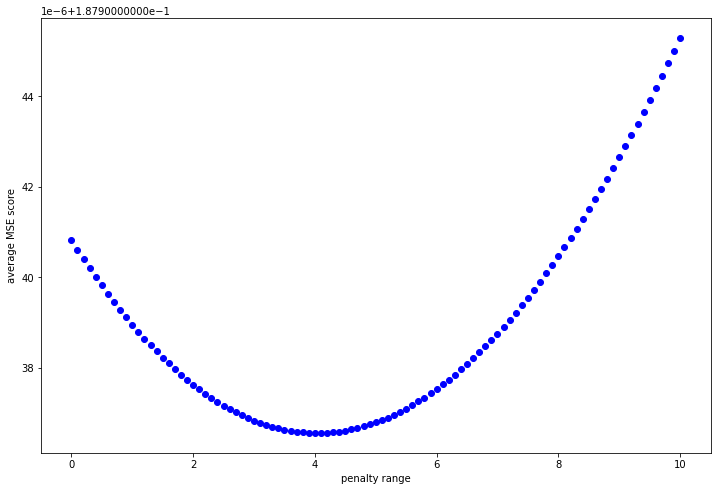

best penalty: 4.0
best MSE: 0.18793656308122192


In [1005]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# define the train set
chem_train_unstd = chemistry_samples.iloc[:, :-1].values

# define the train target values
chem_train_y = chemistry_samples.iloc[:, -1].values

# create a standardised numpy array
mu = train_mu(chem_train_unstd)
sigma = train_sigma(chem_train_unstd)
chem_train = standardise_train(chem_train_unstd, mu, sigma)

# choose the number of folds wanted, in the question it is 5
folds = 5

# define the fold indexes to be used in the cross validation
folds_indexes = define_folds_indexes(chem_train_y, folds)

# define the penalty range to test
penalty_range = np.linspace(0, 10, 101)

# work out the best penalty
best_penalty, best_MSE = choose_best_penalty(chem_train, chem_train_y, folds_indexes, penalty_range)
print('best penalty:', best_penalty)
print('best MSE:', best_MSE)

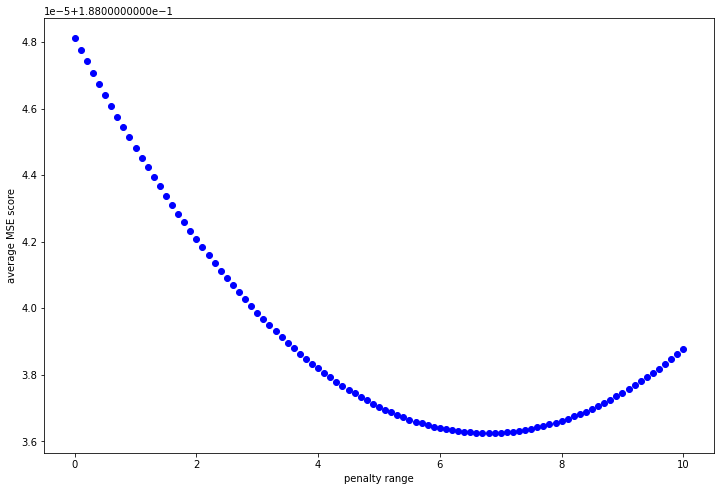

seed: 0
best penalty: 6.800000000000001
best MSE: 0.18803624771244926


In [1011]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# define the train set
chem_train_unstd = chemistry_samples.iloc[:, :-1].values

# define the train target values
chem_train_y = chemistry_samples.iloc[:, -1].values

# create a standardised numpy array
mu = train_mu(chem_train_unstd)
sigma = train_sigma(chem_train_unstd)
chem_train = standardise_train(chem_train_unstd, mu, sigma)

# permute the data into a random order
seed = 0
np.random.seed(seed)
p = np.random.permutation(len(chem_train_y))
chem_train = chem_train[p]
chem_train_y = chem_train_y[p]

# choose the number of folds wanted, in the question it is 5
folds = 5

# define the fold indexes to be used in the cross validation
folds_indexes = define_folds_indexes(chem_train_y, folds)

# define the penalty range to test
penalty_range = np.linspace(0, 10, 101)

# work out the best penalty
best_penalty, best_MSE = choose_best_penalty(chem_train, chem_train_y, folds_indexes, penalty_range)
print('seed:', seed)
print('best penalty:', best_penalty)
print('best MSE:', best_MSE)

I have created functions to tune the penalty variable along a penalty range, and the 5-fold cross_validation works, and creates a convex curve ensuring that the minimal MSE score found is the global maximum. However, I noticed that if you change the seed, and permute the data into a different order, it gives back a different optimal penalty value. I have implemented an algorithm below, which loops through 100 different random seeds to  store the optimal penalties for each iteration, which if I look at a frequency table, hopefully a certain penalty will come out more time than others, and such I will use it as my optimal penalty and find a seed where it is the optimal penalty.

In [ ]:
repeats = 100
penalties = []
for i in range(repeats):

    # load data as pandas data frames
    chemistry_samples = pd.read_csv('chemistry_samples.csv')

    # define the train set
    chem_train_unstd = chemistry_samples.iloc[:, :-1].values

    # define the train target values
    chem_train_y = chemistry_samples.iloc[:, -1].values

    # create a standardised numpy array
    mu = train_mu(chem_train_unstd)
    sigma = train_sigma(chem_train_unstd)
    chem_train = standardise_train(chem_train_unstd, mu, sigma)


    # permute the data into a random order
    seed = 2376*i
    np.random.seed(seed)
    p = np.random.permutation(len(chem_train_y))
    chem_train = chem_train[p]
    chem_train_y = chem_train_y[p]

    # choose the number of folds wanted, in the question it is 5
    folds = 5

    # define the fold indexes to be used in the cross validation
    folds_indexes = define_folds_indexes(chem_train_y, folds)

    # define the penalty range to test
    penalty_range = np.linspace(0, 10, 101)

    # work out the best penalty
    best_penalty, best_MSE = choose_best_penalty(chem_train, chem_train_y, folds_indexes, penalty_range)
    print('seed:', seed)
    print('best penalty:', best_penalty)
    print('best MSE:', best_MSE)
    
    penalties.append(best_penalty)

In [1029]:
penalties_df = pd.Series(penalties)
penalties_df.value_counts().head()

3.1    6
3.7    5
3.4    5
2.6    4
4.1    4
dtype: int64

After running the algorithm, I have hid the outputs as this will be 100 graphs, I can analyse it through the frequency table of the optimal penalties and minimal MSE achieved over all the different seeds. This gives the top 5 results to be 3.1, 3.7, 3.4, 2.6, 4.1. As you can see they are all very close and such any would be a very good optimal solution. As 3.1 has a frequency of 6 and the rest have 5 I will take this one and find a seed in which this is achieved. By going through my outputs I can see that seed: 11880 gives the best penalty: 3.1, and the corresponding best MSE: 0.18734. I will repeat this below so that you can see the graph also.

In [1059]:
ultimate_seed = 11880

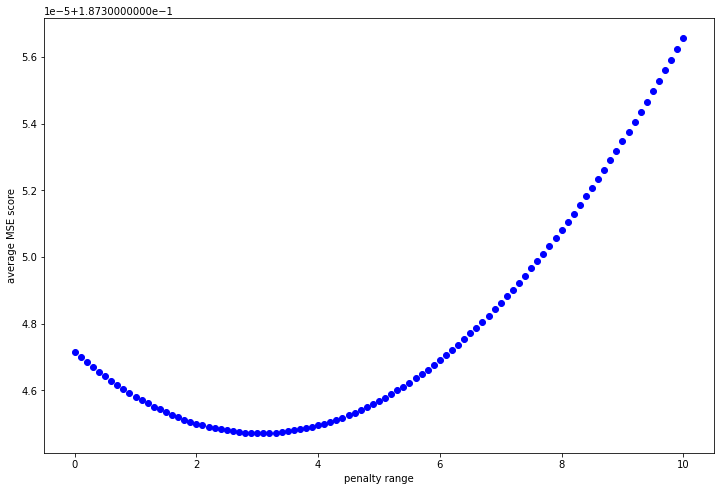

ultimate seed: 11880
ultimate penalty: 3.1
ultimate MSE: 0.18734471704193573


In [1065]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# define the train set
chem_train_unstd = chemistry_samples.iloc[:, :-1].values

# define the train target values
chem_train_y = chemistry_samples.iloc[:, -1].values

# create a standardised numpy array
mu = train_mu(chem_train_unstd)
sigma = train_sigma(chem_train_unstd)
chem_train = standardise_train(chem_train_unstd, mu, sigma)

# permute the data into a random order
np.random.seed(ultimate_seed)
p = np.random.permutation(len(chem_train_y))
chem_train = chem_train[p]
chem_train_y = chem_train_y[p]

# choose the number of folds wanted, in the question it is 5
folds = 5

# define the fold indexes to be used in the cross validation
folds_indexes = define_folds_indexes(chem_train_y, folds)

# define the penalty range to test
penalty_range = np.linspace(0, 10, 101)

# work out the best penalty
ultimate_penalty, ultimate_MSE = choose_best_penalty(chem_train, chem_train_y, folds_indexes, penalty_range)
print('ultimate seed:', ultimate_seed)
print('ultimate penalty:', ultimate_penalty)
print('ultimate MSE:', ultimate_MSE)

The graph above is the one produced from the ultimate seed I stated above. It gives the ultimate penalty of 3.1 and the ultimate MSE for this seed is 0.18734. The one thing that all the seeds share is that they all produce a convex shape, which means that the optimum penalty found is always a global minimum for that seed. But if we look at why this curve is produced, we know that $MSE = Var + Bias^2$. And we also know that ridge regression induces a bias to its estimator by introducing the penalty term. This means that the bias will be non zero for any penalty term not equal to 0, but we can also see that the overall MSE decreases until the optimal MSE at a penalty of 3.1. This means that the variance must decrease more than the $Bias^2$ increases for the overall MSE to decrease. This is the bias/variance trade-off. You can imagine the generic curve under the one above that demonstrates how to optimize the MSE. At the optimized MSE, penalty of 3.1, will be where the varaince plus the bias squared is minimized, and such for penalty values larger, the variance will still decrease, but not by enough to be less than the increase in the bias squared. As we know form the notes, as the penalty term goes to infinity the variance goes to 0, and thats how we know it will continue to decrease monotonically as the penalty increases. As the MSE is convex near the optimal value and as the penalty increases past the optimal value, the MSE increases also. This means as the penalty value tends to infinity, the bias increases. From the graph below, you can see that MSE is not convex past a certain penalty value. Luckily for us this is not near the optimal value, and such our optimal value is still a global minimum. However, it does show that the MSE doesn't tend to infinity as the penalty does tend to infinity. This means that the bias won't tend to inifnity either.

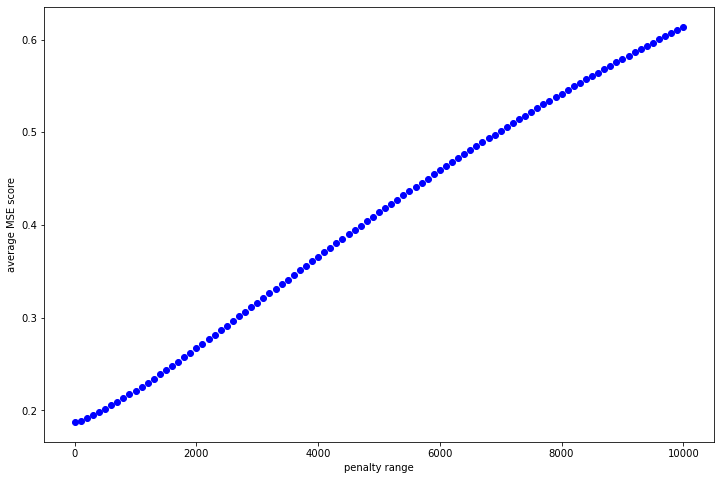

In [1066]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# define the train set
chem_train_unstd = chemistry_samples.iloc[:, :-1].values

# define the train target values
chem_train_y = chemistry_samples.iloc[:, -1].values

# create a standardised numpy array
mu = train_mu(chem_train_unstd)
sigma = train_sigma(chem_train_unstd)
chem_train = standardise_train(chem_train_unstd, mu, sigma)

# permute the data into a random order
np.random.seed(ultimate_seed)
p = np.random.permutation(len(chem_train_y))
chem_train = chem_train[p]
chem_train_y = chem_train_y[p]

# choose the number of folds wanted, in the question it is 5
folds = 5

# define the fold indexes to be used in the cross validation
folds_indexes = define_folds_indexes(chem_train_y, folds)

# define the penalty range to test
penalty_range = np.linspace(0, 10000, 101)

# work out the best penalty
best_penalty, best_MSE = choose_best_penalty(chem_train, chem_train_y, folds_indexes, penalty_range)

1.2.2

I have fixed the hyper-parameter to the optimal value found in 1.2.1 and retrained the model on the whole training data. I repeated this for the whole test set also. I have the compared the R2 scores for both in and out of sample for ridge regression. I have then compared my results to augmented linear regression.

In [1072]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# convert from data frame to numpy array
chem_train_unstd = chemistry_samples.iloc[:, :-1].values

# create a standardised numpy array
mu = train_mu(chem_train_unstd)
sigma = train_sigma(chem_train_unstd)
chem_train = standardise_train(chem_train_unstd, mu, sigma)

# define the augmented train set 
chem_train_aug = np.hstack([np.ones((chem_train.shape[0],1)), chem_train])

# define the train target values
chem_train_y = chemistry_samples.iloc[:, -1].values

# work out the augmented maximum likelihood estimates
chem_train_beta_ridge_ultimate = ridge_estimate(chem_train, chem_train_y, ultimate_penalty)

# predict the function values at the test points using the augmented maximum likelihood estimator
chem_train_ridge_prediction_y_ultimate = predict_with_estimate(chem_train_aug, chem_train_beta_ridge_ultimate)

print('ultimate penalty:', ultimate_penalty)
print(r'ultimate train R2 score:', r2_score(chem_train_y, chem_train_ridge_prediction_y_ultimate))

ultimate penalty: 3.1
ultimate train R2 score: 0.8718248983916113


In [1081]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# convert from data frame to numpy array
chem_train_unstd = chemistry_samples.iloc[:, :-1].values

# create a standardised numpy array
mu = train_mu(chem_train_unstd)
sigma = train_sigma(chem_train_unstd)
chem_train = standardise_train(chem_train_unstd, mu, sigma)

# define the augmented train set 
chem_train_aug = np.hstack([np.ones((chem_train.shape[0],1)), chem_train])

# define the train target values
chem_train_y = chemistry_samples.iloc[:, -1].values

# work out the augmented maximum likelihood estimates
chem_train_beta_ridge_ultimate = ridge_estimate(chem_train, chem_train_y, ultimate_penalty)

# load data as pandas data frames
chemistry_test = pd.read_csv('chemistry_test.csv')

# convert from data frame to numpy array
chem_test_unstd = chemistry_test.iloc[:, :-1].values

# create a standardised numpy array
chem_test = standardise_train(chem_test_unstd, mu, sigma)

# define the augmented test set 
chem_test_aug = np.hstack([np.ones((chem_test.shape[0],1)), chem_test])

# define the test target values
chem_test_y = chemistry_test.iloc[:, -1].values

# predict the function values at the test points using the augmented maximum likelihood estimator
chem_test_ridge_prediction_y_ultimate = predict_with_estimate(chem_test_aug, chem_train_beta_ridge_ultimate)

print('ultimate penalty:', ultimate_penalty)
print(r'ultimate test R2 score:', r2_score(chem_test_y, chem_test_ridge_prediction_y_ultimate))

ultimate penalty: 3.1
ultimate test R2 score: 0.8642991237441057


In [1082]:
headers = ['In-sample R2 score', 'Out-of-sample R2 score']
data = [[r2_score(chem_train_y, chem_train_aug_ml_prediction_y), r2_score(chem_test_y, chem_test_aug_ml_prediction_y)],
[r2_score(chem_train_y, chem_train_ridge_prediction_y_ultimate), r2_score(chem_test_y, chem_test_ridge_prediction_y_ultimate)]]
rows = ['augmented linear regression', 'ridge regression']
pd.DataFrame(data, index=rows, columns=headers)

,In-sample R2 score,Out-of-sample R2 score
augmented linear regression,0.871826,0.864293
ridge regression,0.871825,0.864299


The in-sample ridge regression R2 score is 0.871825. This means that for the training data, the model accounts for 87 percent of the variance of the trainig data. This is a very good score, and means that it fits the data very well. When comparing this to the out-of-sample ridge regression R2 score of 0.864299. This is also a very good model for the test data, accounting for 86 percent of the variance. Again, the R2 score for the test data is slightly less than the train data, and this will be a similar reason to linear regression and will down to overfitting to the train data, but they are also very similar and 1 percent difference in accounting for the variance is a very small difference.

Comparing the R2 scores for the ridge regression to the augmented linear regression, we can see that for the in-sample R2 score, linear regression is slightly higher, but this difference is very small. This will be because of the induced bias of the ridge estimate, but because the linear regression was such a good fit in the first place, to optimise it further, the bias induced will be very minimal. However, when comparing the out-of-sample R2 scores, we can see that the induced bias for the ridge regression has worked and is minimally larger than linear regression. This means that ridge regression has successfully reduced the variance, and such the model accounts for more of the variance for the test data. This is the improvement we would expect from ridge regression, as now the two scores are closer than that of linear regression meaning that the model is more generalised. 

In [1103]:
headers = ['Intercept'] + list(chemistry_samples.columns[:-1].values) + ['Absolute value squared of beta']
data = [list(chem_train_aug_beta_ml) + [np.mean(chem_train_aug_beta_ml**2)],
list(chem_train_beta_ridge_ultimate) + [np.mean(chem_train_beta_ridge_ultimate**2)]]
rows = ['Augmented Linear Regression', 'Ridge Regression']
pd.DataFrame(data, index=rows, columns=headers)

,Intercept,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3,Absolute value squared of beta
Augmented Linear Regression,4.13993,0.034996,0.537535,-0.015081,0.253095,0.004387,0.565182,-0.264034,-0.253853,-0.079945,-0.000829,1.632134
Ridge Regression,4.13993,0.036757,0.535508,-0.016458,0.252795,0.004903,0.564641,-0.262904,-0.252187,-0.079588,0.001024,1.631747


I added this table in to compare the coeffcients for the two different regressions to see what values hhave been shrunk to optimize the ridge regression. In general, most values are very similar, and this makes sense as the R2 scores for each are very similar for both in and out of sample. However from the absolute value squared of beta column, we can see that the absolute value squared of the ridge beta is less than that of the linear regression. This shows that values have been shrunk to optimize the regression.

<a name="q13"></a>

## 1.3 [^](#outline)


1.3.1 

I have implemented the relaxation of the lasso optimisation by solving the gradient descent of the huber function. I have used the template given and completed the two functions huber and grad_huber. Both have c set to $1 \times 10^{-3}$. For the solution to the grad_huber function, I have created a Boolean array to tell if the $\lvert \beta \lvert \leqslant c $ and this allows me to apply the 2 different functions to each condition. I also worked out the gradient for the huber function to be :
$$\nabla _{\beta} L_{c} = \left\{
        \begin{array}{ll}
            \beta & \quad \lvert \beta \lvert  \leqslant c \\
            c*sign(\beta) & \quad otherwise
        \end{array}
    \right.$$
This gives the whole gradient of the whole lasso function to be:
$$\nabla _{\beta} L_{LASSO} = \frac{2}{n}(X^T X \beta - X^Ty) + \lambda \nabla _{\beta} L_{c}$$
This is then finished by subtracting the whole gradient times by the step size from $\beta$. 

With the grad_huber function returning the gradient descent vector for the current $\beta$ value, I created a function called minimize_ls_huber. This function implements the gradient descent by looping through n_iters, and at each iteration, will update the $\beta$ function by using the formula I used above, and then updating the $\beta$ by subtracting the gradient function times by the step size. One thing I had to modify was the n_iters value, as I will explain in a later part in more depth, but for summary, I initially used a value of 10,000 but I would get a large $\lambda$.  But, when differing the n_iters above or below the 10,000 value I would get a differing $\lambda$. To overcome this I increased the n_iters to values of 100,000 up to 1,000,000. Throughout this range the $\lambda$ remained constant and such meant that the algorithm had finally converged to a stable result, and such the n_iters is now set to 100,000, the minimal value in which convergence is achieved, in order to reduce computational time of running the algorithm.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1089]:
def huber(beta, c=1e-3):
    huber_return = np.zeros(beta.shape)
    condition_indexes = np.abs(beta) <= c
    huber_return[condition_indexes] = beta[condition_indexes]**2/2
    huber_return[~condition_indexes] = c*(np.abs(beta[condition_indexes])-c/2)
    return huber_return

def grad_huber(beta, c=1e-3):
    grad_huber_return = np.zeros(beta.shape)
    condition_indexes = np.abs(beta) <= c
    grad_huber_return[condition_indexes] = beta[condition_indexes]*1.0
    grad_huber_return[~condition_indexes] = c*np.sign(beta[~condition_indexes])
    return grad_huber_return

In [1090]:
def minimize_ls_huber(X, y, lambd, n_iters=100000, step_size=1e-3):
    
    # X: N x D+1 matrix of training inputs
    # y: N x 1 vector of training targets 
    # lambd: float of the lasso lambda penalty 
    # n_iters: integer of number of iterations to carry out 
    # step_size: float of step size
    # returns: beta coefficients to minimize huber (D+1 x 1)
    
    n, p = X.shape
    XX = X.T @ X / n
    Xy = (X.T @ y / n).reshape(p, 1)
    
    # next line: initialise betas
    beta = np.zeros(shape=(p, 1))

    # gradient descent (hint: see logistic regression coding task)
    for i in range(n_iters):
        grad = 2*(XX @ beta - Xy) + lambd*grad_huber(np.vstack([0, beta[1:]]))
        # next line: gradient descent update
        beta = beta - step_size*grad
    
    return np.squeeze(beta)

1.3.2

I have created some functions to test my minimize_ls_huber function. They are very similar to what I have done before, but this time for the new lasso function. The functions include a score function that calculates the MSE of the lasso predicted values. A cross validation function which splits the data into the 5-fold cross-validation method, and then takes the average of each of the MSE scores and returns it. 

With these updated functions, I can then use my 5-fold cross-validation to conduct a grid search to find the minimal MSE $\lambda$. One thing that I noticed when first implementing the algorithm was when condiucting a grid search on the given train data, It would return an optimal $\lambda$ at around 13.9. It would also return a graph that illustrates that the value found is the global minimum. However, my function was at 100,000 n_iters at this point, and by increasing this value to check that the results are consistant, I found that it decreases the $\lambda$. But also with the new $\lambda$, the MSE is reduced, which shows that the value found before was not optimal, and such means the function hadn't converged in the number of n_iters. This is when I decided to standardise the data. I done this because when applying the penalty huber function, large variance variables will start with a small beta value, and such will be penalized less, however if they are standardised then will be penalized more, which will result in a much better fit. This will also help in the final results to see final importance of variables, because when they are standadized they are all on the same scale and such can compared importance in magnitude of beta coeffcients. However, the main importance here is that the penalty of variables will converge faster if they are all on the same scale, and such when I rerun the function with the standardized data, I get that the values converge to a consistent $\lambda$ of around 2.4. This now has a consistent value, and the MSE returned in lower than that of linear least squares. The graphs below show that for the lambda_range given the average MSE is convex and therefore allows us to conclude that the $\lambda$ of 2.5 is the global minimum for the lasso regression.

I the compare the $\lambda$ found of 2.5 to the whole train set and this returns R2 score: 0.87182, which is slightly less than that of both ridge, and augmented linear regression. However the difference is very low, and such is still a very valid regression for the train data set, accounting for 87 percent of the variance.

When I would out the R2 score on the test set I get R2 score: 0.864305. When compared to the other medthods before, this is the best result, very minimally better, but still higher. This shows that the shrinkage for this relaxation of lass regression is more general than ridge or linear regression.

I have created a summary table comparing the R2 scores for all the methods on this current data set, including the in-score, and the out-score.

In [875]:
def score_lasso_MSE(X_train, y_train, X_test, y_test, lambd):
    
    # X_train: 4M x D matrix of training inputs
    # y_train: 4M x 1 vector of training targets
    # X_test: M x D matrix of test inputs
    # y_test: M x 1 vector of test targets
    # lambd: float of the lasso lambda penalty
    # returns: MSE of the lasso prediction
    
    X_train_aug = np.hstack([np.ones((X_train.shape[0],1)), X_train])
    beta_aug = minimize_ls_huber(X_train_aug, y_train, lambd)
    
    X_test_aug = np.hstack([np.ones((X_test.shape[0],1)), X_test])
    y_pred = predict_with_estimate(X_test_aug, beta_aug)
    return np.mean((y_test-y_pred)**2)


def cross_validation_score_lasso(X_train, y_train, folds, lambd):
    
    # X_train: N x D matrix of training inputs
    # y_train: N x 1 vector of training targets
    # folds: f x N/f matrix of indexes to cross validate
    # lambd: float of the lambda penalty for lasso regression
    # returns: average MSE score for the given lambda penalty lasso regression
    
    scores = []
    for i in range(len(folds)):
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))

        X_train_i = X_train[train_indexes, :]
        y_train_i = y_train[train_indexes]

        X_val_i = X_train[val_indexes, :]
        y_val_i = y_train[val_indexes]

        score_i = score_lasso_MSE(X_train_i, y_train_i, X_val_i, y_val_i, lambd)
        
        scores.append(score_i)
    
    # Return the average score
    return sum(scores) / len(scores)


def choose_best_lambd(X_train, y_train, folds, lambd_range):
    
    # X_train: N x D matrix of training inputs
    # y_train: N x 1 vector of training targets
    # folds: f x N/f matrix of indexes to cross validate
    # lambd_range: M x 1 vector of lambda penalty values to test
    # returns: lowest average MSE penalty value from penalty range
    
    lambd_scores = np.zeros((len(lambd_range),))

    for i, lambd in enumerate(lambd_range):
        lambd_scores[i] = cross_validation_score_lasso(X_train, y_train, folds, lambd)
    
    plt.figure(figsize=(12,8))
    plt.xlabel('lambda penalty range')
    plt.ylabel('average MSE score')
    plt.scatter(lambd_range, lambd_scores, c='blue')
    plt.show()  

    best_lambd_index = np.argmin(lambd_scores)
    return lambd_range[best_lambd_index], lambd_scores[best_lambd_index]

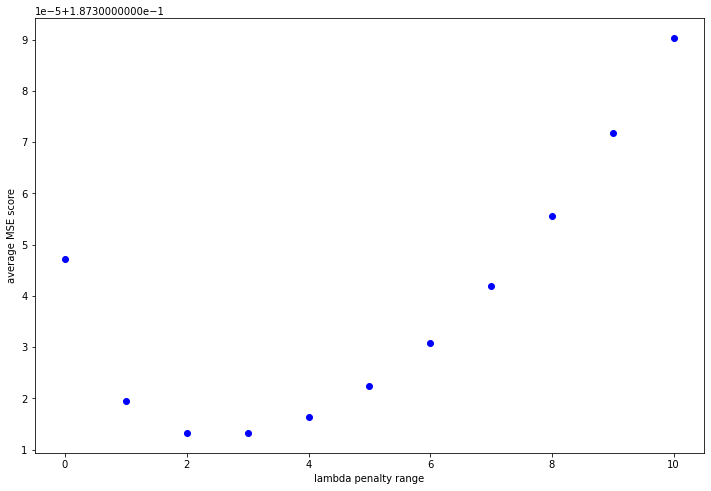

seed: 11880
best lambda: 2.0
best MSE: 0.18731322071593687


In [1092]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# convert from data frame to numpy array
chem_train = chemistry_samples.iloc[:, :-1].values

# create a standardised numpy array
mu = train_mu(chem_train)
sigma = train_sigma(chem_train)
chem_train_std = standardise_train(chem_train, mu, sigma)

# define the train target values
chem_train_y = chemistry_samples.iloc[:, -1].values

# permute the data into a random order
seed = ultimate_seed
np.random.seed(seed)
p = np.random.permutation(len(chem_train_y))
chem_train_std = chem_train_std[p]
chem_train_y = chem_train_y[p]

# choose the number of folds wanted, in the question it is 5
folds = 5

# define the fold indexes to be used in the cross validation
folds_indexes = define_folds_indexes(chem_train_y, folds)

# define the lambda penalty range to test
lambd_range = np.linspace(0, 10, 11)

# work out the best lambda penalty
best_lambd, best_MSE = choose_best_lambd(chem_train_std, chem_train_y, folds_indexes, lambd_range)

print('seed:', seed)
print('best lambda:', best_lambd)
print('best MSE:', best_MSE)

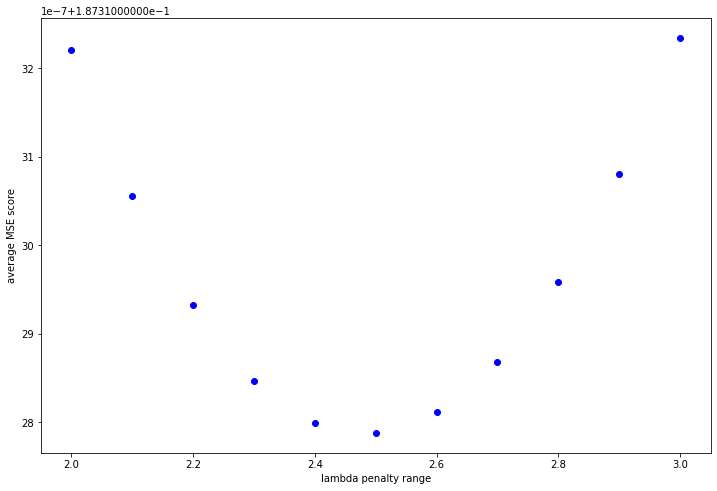

seed: 11880
best lambda: 2.5
best MSE: 0.18731278803049384


In [1098]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# convert from data frame to numpy array
chem_train = chemistry_samples.iloc[:, :-1].values

# create a standardised numpy array
mu = train_mu(chem_train)
sigma = train_sigma(chem_train)
chem_train_std = standardise_train(chem_train, mu, sigma)

# define the train target values
chem_train_y = chemistry_samples.iloc[:, -1].values

# permute the data into a random order
seed = ultimate_seed
np.random.seed(seed)
p = np.random.permutation(len(chem_train_y))
chem_train_std = chem_train_std[p]
chem_train_y = chem_train_y[p]

# choose the number of folds wanted, in the question it is 5
folds = 5

# define the fold indexes to be used in the cross validation
folds_indexes = define_folds_indexes(chem_train_y, folds)

# define the lambda penalty range to test
lambd_range = np.linspace(2, 3, 11)

# work out the best lambda penalty
best_lambd, best_MSE = choose_best_lambd(chem_train_std, chem_train_y, folds_indexes, lambd_range)

print('seed:', seed)
print('best lambda:', best_lambd)
print('best MSE:', best_MSE)

Using the standardised data, it now converges to a consistent lambda value. The best lambda for the same seed as ridge is found to be 2.5, and has an MSE of 0.18731. This is slightly higher than that of the ridge regression for the same seed, but is still smaller than linear regression, which would be when lambda is set to 0.

In [1099]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# define the train set
chem_train = chemistry_samples.iloc[:, :-1].values

# create a standardised numpy array
mu = train_mu(chem_train)
sigma = train_sigma(chem_train)
chem_train_std = standardise_train(chem_train, mu, sigma)

# define the augmented train set
chem_train_aug_std = np.hstack([np.ones((chem_train_std.shape[0],1)), chem_train_std])

# define the train target values
chem_train_y = chemistry_samples.iloc[:, -1].values

# work out the augmented maximum likelihood estimates
chem_train_beta_lasso = minimize_ls_huber(chem_train_aug_std, chem_train_y, best_lambd)

# predict the function values at the test points using the augmented maximum likelihood estimator
chem_train_lasso_prediction_y = predict_with_estimate(chem_train_aug_std, chem_train_beta_lasso)

print(r'Lasso train R2 score:', r2_score(chem_train_y, chem_train_lasso_prediction_y))

Lasso train R2 score: 0.8718204745377761


In [1100]:
# load data as pandas data frames
chemistry_samples = pd.read_csv('chemistry_samples.csv')

# define the train set
chem_train = chemistry_samples.iloc[:, :-1].values

# create a standardised numpy array
mu = train_mu(chem_train)
sigma = train_sigma(chem_train)
chem_train_std = standardise_train(chem_train, mu, sigma)

# define the augmented train set
chem_train_aug_std = np.hstack([np.ones((chem_train_std.shape[0],1)), chem_train_std])

# define the train target values
chem_train_y = chemistry_samples.iloc[:, -1].values

# work out the augmented maximum likelihood estimates
chem_train_beta_lasso = minimize_ls_huber(chem_train_aug_std, chem_train_y, best_lambd)

# load data as pandas data frames
chemistry_test = pd.read_csv('chemistry_test.csv')

# define the train set
chem_test = chemistry_test.iloc[:, :-1].values

# standardise the test numpy array
chem_test_std = standardise_train(chem_test, mu, sigma)

# define the augmented train set
chem_test_aug_std = np.hstack([np.ones((chem_test_std.shape[0],1)), chem_test_std])

# define the test target values
chem_test_y = chemistry_test.iloc[:, -1].values

# predict the function values at the test points using the augmented maximum likelihood estimator
chem_test_lasso_prediction_y = predict_with_estimate(chem_test_aug_std, chem_train_beta_lasso)

print(r'Lasso test R2 score:', r2_score(chem_test_y, chem_test_lasso_prediction_y))

Lasso test R2 score: 0.8643048365784037


In [1101]:
headers = ['In-sample R2 score', 'Out-of-sample R2 score']
data = [[r2_score(chem_train_y, chem_train_aug_ml_prediction_y), r2_score(chem_test_y, chem_test_aug_ml_prediction_y)],
[r2_score(chem_train_y, chem_train_ridge_prediction_y_ultimate), r2_score(chem_test_y, chem_test_ridge_prediction_y_ultimate)],
[r2_score(chem_train_y, chem_train_lasso_prediction_y), r2_score(chem_test_y, chem_test_lasso_prediction_y)]]
rows = ['Augmented Linear Regression', 'Ridge Regression', 'Relaxed Lasso Regression']
pd.DataFrame(data, index=rows, columns=headers)

,In-sample R2 score,Out-of-sample R2 score
Augmented Linear Regression,0.871826,0.864293
Ridge Regression,0.871825,0.864299
Relaxed Lasso Regression,0.871820,0.864305


From the table, we can see that the in-sample R2 score for lasso is 0.871820, which is lower than the other two scores, however is still a very good model. This is to be expected in shrinkage models though, as the idea is to make the model less overfit to the train data and more generalisable to unseen and seen data. The out-of-sample R2 score for lasso is 0.864305 which is the highest so far. Therefore our shrinkage model is working, and such gives a slightly better fit on unseen data than ridge or linear regression. This means that the lasso regression accounts for more of the unseen test data variance than the other two models, and such is more generalisable.

1.3.2

I have created a table below to compare the $\beta$ coefficents for all the methods so far. We can compare the differences of shrinkage between ridge and lasso against the linear regression. From the final column sum value of beta, we can see that the sum of the beta coefficients is the least for lasso regression. This means that both lasso, and ridge shrink the coefficients, but for the sum, lasso shrinks the values the most. One thing that I notice is that ridge and lasso shrink different coefficients different amounts, and in some cases one shrinks, and one enlarges a certain beta coeffcient. One thing that doesn't happen with my optimal solution is for a beta coefficent to go to 0. This is allowed with lasso shrinkage, but for my optimal lambda value, is not neccessary.

In [1102]:
headers = ['Intercept'] + list(chemistry_samples.columns[:-1].values) + ['Sum value of beta']
data = [list(chem_train_aug_beta_ml) + [np.sum(chem_train_aug_beta_ml**2)],
list(chem_train_beta_ridge_ultimate) + [np.sum(chem_train_beta_ridge_ultimate**2)],
list(chem_train_beta_lasso) + [np.sum(chem_train_beta_lasso**2)]]
rows = ['Augmented Linear Regression', 'Ridge Regression', 'Relaxed Lasso Regression']
pd.DataFrame(data, index=rows, columns=headers)

,Intercept,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3,Sum value of beta
Augmented Linear Regression,4.13993,0.034996,0.537535,-0.015081,0.253095,0.004387,0.565182,-0.264034,-0.253853,-0.079945,-0.000829,17.953474
Ridge Regression,4.13993,0.036757,0.535508,-0.016458,0.252795,0.004903,0.564641,-0.262904,-0.252187,-0.079588,0.001024,17.949214
Relaxed Lasso Regression,4.13993,0.034327,0.534536,-0.013925,0.251894,0.004624,0.566060,-0.263515,-0.252560,-0.079304,0.000638,17.949536


<a name="task-2"></a>

# Task 2: Classification [^](#outline)

<a name="q21"></a>

## 2.1 [^](#outline)

2.1.1

I have analysed the new data set, and accounted for the object column, converting 'B' to 0, and 'M' to 1. I have implemented a kNN classifier with a 5-fold cross-validation to apply to this train data to find the optimal k.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

In [66]:
tumour_samples.head()

,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,n1_fractal_dimension,...,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension,DIAGNOSIS
0,10.855170,15.248290,69.167041,359.534878,0.105488,0.080200,0.066410,0.034194,0.182796,0.066968,...,18.984557,81.443134,466.879302,0.149080,0.200185,0.205695,0.111592,0.335999,0.093477,B
1,10.068958,15.532758,66.130635,330.040665,0.099813,0.109540,0.057583,0.023322,0.195650,0.069572,...,22.840293,82.133171,473.367822,0.125478,0.330466,0.283304,0.088021,0.312882,0.096158,B
2,12.271409,18.100314,78.195610,421.537832,0.105147,0.095315,0.043317,0.031539,0.188801,0.063341,...,26.365608,84.598334,620.586067,0.146766,0.118707,0.147900,0.050402,0.291805,0.069556,B
3,10.531733,18.452486,67.227069,340.063033,0.086041,0.049961,0.049709,0.011046,0.203093,0.064948,...,24.385385,73.296855,429.675600,0.100060,0.143683,0.177225,0.028111,0.287749,0.073174,B
4,12.367686,14.399191,80.643814,460.849710,0.106410,0.101420,0.020806,0.021990,0.195326,0.064605,...,19.614305,89.910502,472.323112,0.138135,0.276127,0.151098,0.074396,0.345258,0.095830,B


In [67]:
tumour_samples.dtypes

n1_radius               float64
n1_texture              float64
n1_perimeter            float64
n1_area                 float64
n1_smoothness           float64
n1_compactness          float64
n1_concavity            float64
n1_concave_points       float64
n1_symmetry             float64
n1_fractal_dimension    float64
n2_radius               float64
n2_texture              float64
n2_perimeter            float64
n2_area                 float64
n2_smoothness           float64
n2_compactness          float64
n2_concavity            float64
n2_concave_points       float64
n2_symmetry             float64
n2_fractal_dimension    float64
n3_radius               float64
n3_texture              float64
n3_perimeter            float64
n3_area                 float64
n3_smoothness           float64
n3_compactness          float64
n3_concavity            float64
n3_concave_points       float64
n3_symmetry             float64
n3_fractal_dimension    float64
DIAGNOSIS                object
dtype: o

In [68]:
tumour_samples.describe()

,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,n1_fractal_dimension,...,n3_radius,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension
count,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,...,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000
mean,13.029682,18.548665,84.233919,548.719971,0.094239,0.090580,0.065308,0.035931,0.177328,0.062802,...,14.663288,24.467745,95.930269,702.677392,0.128167,0.215173,0.214074,0.092318,0.279034,0.081437
std,2.885984,4.221551,19.928134,273.761728,0.014147,0.045304,0.065597,0.030775,0.026585,0.007016,...,3.850421,5.977839,26.709150,437.047234,0.021955,0.131825,0.181425,0.055128,0.053817,0.016282
min,6.103021,8.890296,40.782552,81.264657,0.046757,0.009712,0.000096,0.000007,0.101109,0.046822,...,7.505366,9.086115,47.181789,142.227022,0.066493,0.003185,0.000323,0.000172,0.142717,0.049310
25%,11.325876,15.566867,72.116079,390.296984,0.084233,0.058299,0.022258,0.016573,0.159285,0.058010,...,12.351142,20.025896,80.149971,465.113601,0.112777,0.124401,0.087132,0.055537,0.243804,0.070209
50%,12.600748,18.028565,81.059156,487.419503,0.093018,0.080205,0.044616,0.026659,0.174766,0.061567,...,13.882897,23.860967,89.970435,591.411030,0.127617,0.185859,0.171640,0.082474,0.273810,0.078387
75%,14.195022,20.811432,91.278233,616.154878,0.103151,0.112145,0.084666,0.045460,0.192821,0.066148,...,15.779131,28.107007,103.539839,756.952353,0.141876,0.266072,0.291559,0.118244,0.307163,0.088613
max,28.794695,39.900020,192.696302,2552.249247,0.165977,0.356909,0.442717,0.207216,0.312020,0.097478,...,36.758654,50.012877,253.262332,4180.778744,0.221670,1.077963,1.278368,0.316506,0.679798,0.207772


In [69]:
tumour_samples.shape

(2566, 31)

In [1114]:
tumour_samples['DIAGNOSIS'].unique()

array(['B', 'M'], dtype=object)

In [1115]:
tumour_samples['DIAGNOSIS'].value_counts()

B    2142
M     424
Name: DIAGNOSIS, dtype: int64

I have imported the new data set, and carried out the same analysis as I have before. One thing distictly different about this data set and the previous, is that the target y column DIAGNOSIS is an object type. By displaying the unique values in that column, we can see that it consists of only 2 objects, 'B', and 'M'. To be able to use this for analysis, I will need to convert to object type into a numerical value. The easiest of which will be 0, and 1. I will convert 'B' to be 0, and 'M' to be 1. However, if we look at the value counts for each, 'B' comes up 2142 times , whereas 'M' only appears 424 times. THis means that the data is unbalanced by quite a lot between the two objects. We wil need to be careful of this, because there is a lot less to train for the object 'M', only around 17 percent of the entries are for obeject 'M', it may not be as good at classifying it as it will for the 'B' object. For the rest of the data, it is all complete and float values, and such is ready for analysis. The means and standard deviations are very different also, so we will need to standardise the data again.

In [1116]:
def euclidian_distance(p, q):
    
    # p: D x 1 vector of test train point
    # q: M x D matrix of train inputs
    # returns: euclidian distance between p to rows in q (M x 1)
    
    return np.sqrt(np.sum((p-q)**2, axis=1))


def object_to_int_conversion(y_obj):
    
    # y_obj: M x 1 vector of target points
    # returns: conversion from object to int (M x 1)
    
    int_conversion_indices = y_obj == 'B'
    y_int = np.zeros(y_obj.shape, dtype = int)
    y_int[~int_conversion_indices] = 1
    return y_int


def k_neighbours(X_train, X_test, k=5, return_distance=False):
    
    # X_train: M x D matrix of train inputs
    # X_test: M x D matrix of test inputs
    # k: integer for the number of nearest neighbours
    # return_distance: boolean for whether to retrun distances
    # returns: indices of the nearest neighbours for each test entry
    # returns: distances of the nearest neighbours if boolean is true
    
    n_neighbours = k
    dist = []
    neigh_ind = []

    # compute distance from each point x_test in X_test to all points in X_train (hint: use python's list comprehension)
    point_dist = [euclidian_distance(x_test, X_train) for x_test in X_test]

    # determine which k training points are closest to each test point
    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]

        dist.append(dist_list)
        neigh_ind.append(ind_list)

    # return distances together with indices of k nearest neighbours
    if return_distance:
        return np.array(dist), np.array(neigh_ind)

    return np.array(neigh_ind)


def predict_knn(X_train, y_train, X_test, k=5):
    
    # X_train: M x D vector of train inputs
    # y_train: M x 1 vector of train targets
    # X_test: N x D vector of test inputs
    # k: integer for the number of nearest neighbours
    # returns: prediction for each row in X_test
    
    # each of the k neighbours contributes equally to the classification of any data point in X_test  
    neighbours = k_neighbours(X_train, X_test, k=k)
    # count number of occurences of label with np.bincount and choose the label that has most with np.argmax (hint: use python's list comprehension)
    y_pred = np.array([np.argmax(np.bincount(y_train[neighbour])) for neighbour in neighbours])

    return y_pred


def score_knn(X_train, y_train, X_test, y_test, k=5):
    y_pred = predict_knn(X_train, y_train, X_test, k=k)
    return float(sum(y_pred==y_test))/ float(len(y_test))

In [1117]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

# define the train set
tum_train_unstd = tumour_samples.iloc[:, :-1].values

# standardise the train data to euclidean distance
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_train = standardise_train(tum_train_unstd, mu, sigma)

# define the train target values
tum_train_y_obj = tumour_samples.iloc[:, -1].values
tum_train_y = object_to_int_conversion(tum_train_y_obj)

# set a k value
k = 5

print('Train set mean accuracy:', score_knn(tum_train, tum_train_y, tum_train, tum_train_y, k=k))

Train set mean accuracy: 0.9867498051441933


I have tested that I have implemented kNN classifier correctly. For a set k = 5, I get a mean accuracy of 0.98675 for the train data. This shows that the implementation is working very well, and is able to predict 98 percent of the correct answers of the train data. Next I need to implement the 5-fold cross-vaidation to conduct a grid search to find the best k value for the optimal mean accuracy.

In [1118]:
def cross_validation_score_knn(X_train, y_train, folds, k):
    scores = []
    for i in range(len(folds)):
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))

        X_train_i = X_train[train_indexes, :]
        y_train_i = y_train[train_indexes]


        X_val_i = X_train[val_indexes, :]
        y_val_i = y_train[val_indexes]

        score_i = score_knn(X_train_i, y_train_i, X_val_i, y_val_i, k=k) 
        scores.append(score_i)

    # Return the average score
    return sum(scores) / len(scores)


def choose_best_k(X_train, y_train, folds, k_range):
    k_scores = np.zeros((len(k_range),))

    for i, k in enumerate(k_range):
        k_scores[i] = cross_validation_score_knn(X_train, y_train, folds, k)
        #print(f'CV_ACC@k={k}: {k_scores[i]:.3f}')
        
    plt.figure(figsize=(12,8))
    plt.xlabel('k')
    plt.ylabel('average mean accuracy')
    plt.scatter(k_range, k_scores, c='blue')
    plt.show()  
    
    best_k_index = np.argmax(k_scores)
    
    return k_range[best_k_index]

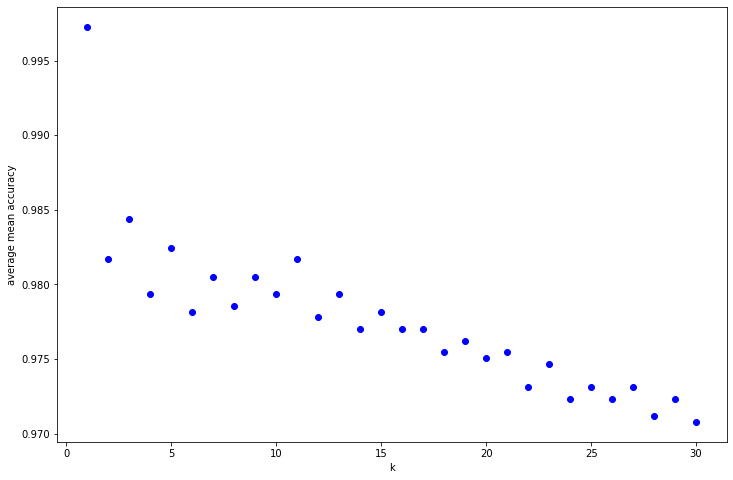

best_k: 1


In [1119]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

# define the train set
tum_train_unstd = tumour_samples.iloc[:, :-1].values

# standardise the train data to euclidean distance
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_train = standardise_train(tum_train_unstd, mu, sigma)

# define the train target values
tum_train_y_obj = tumour_samples.iloc[:, -1].values
tum_train_y = object_to_int_conversion(tum_train_y_obj)

# permute the data into a random order
seed = ultimate_seed
np.random.seed(seed)
p = np.random.permutation(len(tum_train_y))
tum_train = tum_train[p]
tum_train_y = tum_train_y[p]

# choose the number of folds wanted, in the question it is 5
folds = 5

# define the fold indexes to be used in the cross validation
folds_indexes = define_folds_indexes(tum_train_y, folds)

# define the lambda penalty range to test
k_range = np.arange(1, 31)

best_k = choose_best_k(tum_train, tum_train_y, folds_indexes, k_range)

print('best_k:', best_k)

I have created a 5-fold cross-validation grid search to optimize k for the training data. I have plotted a figure of average mean accuracy against k, this is using the same seed that I found before. This returns that the optimal k value is 1 at an average mean accuracy of 1. The graph shows that after k = 1 it roughly is a linear descent downwards. However at k=1, it creates a perfect score when cross-validating it, which is very impressive, but may be overfit to the training data. This is because $k=1$ is the smallest k possible and such can be very sensitive to noise. To test if this is generalisable, we would have to test it on unseen data also.

2.1.2

I have imported the test data set and analysed it. I have treated it in the same was as the previous part. I have then applied my optimal k to the test set and analysed the performance.

In [1122]:
# load data as pandas data frames
tumour_test = pd.read_csv('tumour_test.csv', index_col = 0)

In [1123]:
tumour_test.head()

,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,n1_fractal_dimension,...,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension,DIAGNOSIS
0,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,M
1,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,B
2,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,B
3,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,B
4,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B


In [1129]:
tumour_test.dtypes

n1_radius               float64
n1_texture              float64
n1_perimeter            float64
n1_area                 float64
n1_smoothness           float64
n1_compactness          float64
n1_concavity            float64
n1_concave_points       float64
n1_symmetry             float64
n1_fractal_dimension    float64
n2_radius               float64
n2_texture              float64
n2_perimeter            float64
n2_area                 float64
n2_smoothness           float64
n2_compactness          float64
n2_concavity            float64
n2_concave_points       float64
n2_symmetry             float64
n2_fractal_dimension    float64
n3_radius               float64
n3_texture              float64
n3_perimeter            float64
n3_area                 float64
n3_smoothness           float64
n3_compactness          float64
n3_concavity            float64
n3_concave_points       float64
n3_symmetry             float64
n3_fractal_dimension    float64
DIAGNOSIS                object
dtype: o

In [1130]:
tumour_test.describe()

,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,n1_fractal_dimension,...,n3_radius,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,13.933990,19.392450,90.696200,634.57700,0.096639,0.103793,0.086873,0.046773,0.181978,0.063207,...,15.984250,25.826500,105.490950,844.177500,0.132420,0.252194,0.277323,0.111941,0.291275,0.084354
std,3.387971,4.466204,23.471085,319.82526,0.014163,0.055330,0.083085,0.037922,0.026406,0.007341,...,4.572518,6.058417,31.912468,503.631943,0.022069,0.162197,0.237187,0.066767,0.057646,0.017952
min,6.981000,10.720000,43.790000,143.50000,0.065760,0.033980,0.000000,0.000000,0.120300,0.050240,...,7.930000,12.490000,50.410000,185.200000,0.084090,0.046190,0.000000,0.000000,0.156500,0.055040
25%,11.562500,16.292500,73.917500,409.02500,0.085948,0.060612,0.025642,0.018545,0.163375,0.057772,...,12.732500,21.187500,82.675000,489.500000,0.117625,0.133725,0.101057,0.059840,0.255050,0.071675
50%,13.290000,18.925000,86.110000,546.20000,0.095505,0.085860,0.052690,0.031045,0.179600,0.061290,...,14.940000,25.680000,97.505000,689.000000,0.130150,0.204700,0.204550,0.097465,0.285000,0.080210
75%,15.652500,22.032500,103.025000,785.25000,0.105325,0.132850,0.124300,0.066903,0.195750,0.067013,...,18.520000,30.025000,124.150000,1036.500000,0.147200,0.341600,0.383700,0.158175,0.317800,0.092120
max,23.290000,39.280000,158.900000,1685.00000,0.163400,0.345400,0.426400,0.182300,0.290600,0.095020,...,31.010000,44.870000,206.800000,2944.000000,0.190200,0.932700,1.252000,0.291000,0.544000,0.144600


In [1131]:
tumour_test.shape

(200, 31)

In [1132]:
tumour_test['DIAGNOSIS'].unique()

array(['M', 'B'], dtype=object)

In [1133]:
tumour_test['DIAGNOSIS'].value_counts()

B    127
M     73
Name: DIAGNOSIS, dtype: int64

Carrying out the same anaylysis on the test data set. I can see that it is in the same format as before, with the diagnosis column containing the same objects, however in a different ratio this time, there are more 'M' objects comparitively, being around 37 percent of the data this time, whereas the training data they appear in about 17 percent of the entries. The other columns are all the same type, and can be used straight away for analysis.

In [1120]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

# define the train set
tum_train_unstd = tumour_samples.iloc[:, :-1].values

# standardise the train data to euclidean distance
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_train = standardise_train(tum_train_unstd, mu, sigma)

# define the train target values
tum_train_y_obj = tumour_samples.iloc[:, -1].values
tum_train_y = object_to_int_conversion(tum_train_y_obj)


print('Train set mean accuracy:', score_knn(tum_train, tum_train_y, tum_train, tum_train_y, k=best_k))

Train set mean accuracy: 1.0


In [1121]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

# define the train set
tum_train_unstd = tumour_samples.iloc[:, :-1].values

# standardise the train data to euclidean distance
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_train = standardise_train(tum_train_unstd, mu, sigma)

# define the train target values
tum_train_y_obj = tumour_samples.iloc[:, -1].values
tum_train_y = object_to_int_conversion(tum_train_y_obj)

# load data as pandas data frames
tumour_test = pd.read_csv('tumour_test.csv', index_col = 0)

# define the test set
tum_test_unstd = tumour_test.iloc[:, :-1].values

# standardise the test data to euclidean distance
tum_test = standardise_train(tum_test_unstd, mu, sigma)

# define the test target values
tum_test_y_obj = tumour_test.iloc[:, -1].values
tum_test_y = object_to_int_conversion(tum_test_y_obj)


print('Test set mean accuracy:', score_knn(tum_train, tum_train_y, tum_test, tum_test_y, k=best_k))

Test set mean accuracy: 1.0


With the optimal k fixed at 1, when tested on the entire training data set, it also gets a perfect accuracy of 1. This is incredible and means that the classifier is perfect, and manages to classify every single value correctly. However, what is more impressive, is that it also gets a perfect accuracy of 1 against the test data set also. This means that when trained on the training set, it can perfectly predict every data point of the test set. This is very impressive, because it shows that it is generalisable, whilst keeping its perfect accuracy score. 

<a name="q22"></a>

## 2.2 [^](#outline)

2.2.1

I have implemened a cross-entropy random forest classifier which uses a 5-fold cross-validation to optimise the number of trees, and the maximum depth of each tree. I have then recorded the accuracy of the model.

In [201]:
from collections import defaultdict
import pandas as pd
import numpy as np

In [341]:
def cross_entropy(y, sample_weights):
    """ 
    Calculate the GINI-index for labels.
    Arguments:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
    Returns:
      (float): the GINI-index for y.
    """

    # count different labels in y，and store in label_weights
    # initialize with zero for each distinct label.
    label_weights = {yi: 0 for yi in set(y)}  
    for yi, wi in zip(y, sample_weights):
          label_weights[yi] += wi

    total_weight = sum(label_weights.values())
    entro = 0
    for label, weight in label_weights.items():
          entro -= (weight / total_weight) * np.log(weight / total_weight)

    return entro


def split_samples(X, y, sample_weights, column, value, categorical):
    """
    Return the split of data whose column-th feature:
    1. equals value, in case `column` is categorical, or
    2. less than value, in case `column` is not categorical (i.e. numerical)

    Arguments:
        X: training features, of shape (N, D).
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
        column: the column of the feature for splitting.
        value: splitting threshold  the samples 
        categorical: boolean value indicating whether column is a categorical variable or numerical.
    Returns:
        tuple(np.array, np.array): tuple of subsets of X splitted based on column-th value.
        tuple(np.array, np.array): tuple of subsets of y splitted based on column-th value.
        tuple(np.array, np.array): tuple of subsets of sample weights based on column-th value.
    """ 

    if categorical:
        left_mask =(X[:, column] == value)
    else:
        left_mask = (X[:, column] < value)

    X_left, X_right = X[left_mask, :], X[~left_mask, :]
    y_left, y_right = y[left_mask], y[~left_mask]
    w_left, w_right  = sample_weights[left_mask], sample_weights[~left_mask]

    return (X_left, X_right), (y_left, y_right), (w_left, w_right)


def cross_entropy_split_value(X, y, sample_weights, column, categorical):
    """
    Calculate the GINI-index based on `column` with the split that minimizes the GINI-index.
    Arguments:
        X: training features, of shape (N, D).
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
        column: the column of the feature for calculating. 0 <= column < D
        categorical: boolean value indicating whether column is a categorical variable or numerical.
    Returns:
        (float, float): the resulted GINI-index and the corresponding value used in splitting.
    """

    unique_vals = np.unique(X[:, column])

    assert len(unique_vals) > 1, f"There must be more than one distinct feature value. Given: {unique_vals}."

    cross_entropy_val, threshold = np.inf, None

    # split the values of i-th feature and calculate the cost 
    for value in unique_vals:
        (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, column, value, categorical)

        # if one of the two sides is empty, skip this split.
        if len(y_l) == 0 or len(y_r) == 0:
            continue

        p_left = sum(w_l)/(sum(w_l) + sum(w_r))
        p_right = 1 - p_left
        new_cost = p_left * cross_entropy(y_l, w_l) + p_right * cross_entropy(y_r, w_r)
        if new_cost < cross_entropy_val:
            cross_entropy_val, threshold = new_cost, value

    return cross_entropy_val, threshold

def majority_vote(y, sample_weights):
    """
    Return the label which appears the most in y.
    Args:
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
    Returns:
          (int): the majority label
    """
    majority_label = {yi: 0 for yi in set(y)}

    for yi, wi in zip(y, sample_weights):
        majority_label[yi] += wi
    return max(majority_label, key=majority_label.get)


def cross_entropy_split_rf(n_features, X, y, sample_weights, columns_dict):
    """
    Choose the best feature to split according to criterion.
    Args:
        n_features: number of sampled features.
        X: training features, of shape (N, D).
        y: vector of training labels, of shape (N,).
        sample_weights: weights for each samples, of shape (N,).
        columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
    Returns:
        (float, int, float): the minimized gini-index, the best feature index and value used in splitting.
    """
    columns = np.random.choice(list(columns_dict.keys()), n_features, replace=False)
    columns_dict = {c: columns_dict[c] for c in columns}

    min_cross_entropy, split_column, split_val = np.inf, 0, 0
    for column, categorical in columns_dict.items():
        # skip column if samples are not seperable by that column.
        if len(np.unique(X[:, column])) < 2:
            continue

        # search for the best splitting value for the given column.
        cross_entropy, val = cross_entropy_split_value(X, y, sample_weights, column, categorical)  ## <-- SOLUTION      
        if cross_entropy < min_cross_entropy:
            min_cross_entropy, split_column, split_val = cross_entropy, column, val

    return min_cross_entropy, split_column, split_val


def build_tree_rf(n_features, X, y, sample_weights, columns_dict, feature_names, depth,  max_depth=10, min_samples_leaf=2):
    """Build the decision tree according to the data.
    Args:
          X: (np.array) training features, of shape (N, D).
          y: (np.array) vector of training labels, of shape (N,).
          sample_weights: weights for each samples, of shape (N,).
          columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
          feature_names (list): record the name of features in X in the original dataset.
          depth (int): current depth for this node.
    Returns:
          (dict): a dict denoting the decision tree (binary-tree). Each node has seven attributes:
            1. 'feature_name': The column name of the split.
            2. 'feature_index': The column index of the split.
            3. 'value': The value used for the split.
            4. 'categorical': indicator for categorical/numerical variables.
            5. 'majority_label': For leaf nodes, this stores the dominant label. Otherwise, it is None.
            6. 'left': The left sub-tree with the same structure.
            7. 'right' The right sub-tree with the same structure.
          Example:
              mytree = {
                  'feature_name': 'petal length (cm)',
                  'feature_index': 2,
                  'value': 3.0,
                  'categorical': False,
                  'majority_label': None,
                  'left': {
                      'feature_name': str,
                      'feature_index': int,
                      'value': float,
                      'categorical': bool,
                      'majority_label': None,
                      'left': {..etc.},
                      'right': {..etc.}
                  }
                  'right': {
                      'feature_name': str,
                      'feature_index': int,
                      'value': float,
                      'categorical': bool,
                      'majority_label': None,
                      'left': {..etc.},
                      'right': {..etc.}
                  }
              }
    """
    # include a clause for the cases where (i) all lables are the same, (ii) depth exceed (iii) X is too small
    if len(np.unique(y)) == 1 or depth>=max_depth or len(X)<=min_samples_leaf: 
        return {'majority_label': majority_vote(y, sample_weights)}

    else:
        CE, split_index, split_val = cross_entropy_split_rf(n_features, X, y, sample_weights, columns_dict)

    # If GI is infinity, it means that samples are not seperable by the sampled features.
    if CE == np.inf:
        return {'majority_label': majority_vote(y, sample_weights)}
    categorical = columns_dict[split_index]
    (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, split_index, split_val, categorical)
    return {
            'feature_name': feature_names[split_index],
            'feature_index': split_index,
            'value': split_val,
            'categorical': categorical,
            'majority_label': None,
            'left': build_tree_rf(n_features, X_l, y_l, w_l, columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf),
            'right': build_tree_rf(n_features, X_r, y_r, w_r, columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf)
    }


def train_rf(B, n_features, X, y,  columns_dict, sample_weights=None, max_depth=10):
    """
    Build the decision tree according to the training data.
    Args:
        B: number of decision trees.
        X: (pd.Dataframe) training features, of shape (N, D). Each X[i] is a training sample.
        y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
        an integer in the range 0 <= y[i] <= C. Here C = 1.
        columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
        sample_weights: weights for each samples, of shape (N,).
    """
    if sample_weights is None:
        # if the sample weights is not provided, we assume the samples have uniform weights
        sample_weights = np.ones(X.shape[0]) / X.shape[0]
    else:
        sample_weights = np.array(sample_weights) / np.sum(sample_weights)

    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    N = X.shape[0]
    training_indices = np.arange(N)
    trees = []

    for _ in range(B):
        sample = np.random.choice(training_indices, N, replace=True)
        X_sample = X[sample, :]
        y_sample = y[sample]
        w_sample = sample_weights[sample]
        tree = build_tree_rf(n_features, X_sample, y_sample, w_sample, columns_dict, feature_names, depth=1, max_depth=max_depth)
        trees.append(tree)

    return trees


def classify(tree, x):
    """
    Classify a single sample with the fitted decision tree.
    Args:
      x: ((pd.Dataframe) a single sample features, of shape (D,).
    Returns:
      (int): predicted testing sample label.
    """
    if tree['majority_label'] is not None: 
        return tree['majority_label']

    elif tree['categorical']:
        if x[tree['feature_index']] == tree['value']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'], x)

    else:
        if x[tree['feature_index']] < tree['value']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'], x)


def predict_rf(rf, X):
    """
    Predict classification results for X.
    Args:
      rf: A trained random forest through train_rf function.
      X: (pd.Dataframe) testing sample features, of shape (N, D).
    Returns:
      (np.array): predicted testing sample labels, of shape (N,).
    """

    def aggregate(decisions):
        count = defaultdict(int)
        for decision in decisions:
              count[decision] += 1
        return max(count, key=count.get)

    if len(X.shape) == 1:
        return aggregate([classify(tree, X) for tree in rf])
    else:
        return np.array([aggregate([classify(tree, x) for tree in rf]) for x in X])


def rf_score(rf, X_test, y_test):

    """
    Predict classification results for X.
    Args:
      rf: A trained random forest through train_rf function.
      X_test: (pd.Dataframe) testing sample features, of shape (N, D).
      y_test: (pd.Series) testing target feature, of shape (N, 1).
    Returns:
      (float): average of correctly predicted targets.
    """
    
    y_pred = predict_rf(rf, X_test)
    return np.mean(y_pred==y_test)

In [1143]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

# define the train set
tum_train_unstd = tumour_samples.iloc[:, :-1].values

# standardise the train data to euclidean distance
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_train = pd.DataFrame(standardise_train(tum_train_unstd, mu, sigma))

# define the train target values
tum_train_y_obj = tumour_samples.iloc[:, -1].values
tum_train_y = pd.Series(object_to_int_conversion(tum_train_y_obj))

training_weights = np.ones_like(tum_train_y) / len(tum_train_y)

# We need a dictionary indicating whether the column index maps to a 
# categorical feature or numerical
# In this example, all features are numerical (categorical=False)
columns_dict = {index: False for index in range(tum_train.shape[1])}

n_features = tum_train.shape[1] // 3
B = 3
# fit the random forest with training data
rf = train_rf(B, n_features, tum_train, tum_train_y, columns_dict, max_depth=3)

rf_score(rf, tum_train.values, tum_train_y.values)

0.9583008573655495

I have implemented the cross-entropy random forest classifier functions. I am testing the training data set on a fixed number of trees being 3, and a max_depth of 3. This returns an average correct score of 0.9583, and such produces a good result. This shows that I have implemented the algorithm correctly, and such can now implement the 5-fold cross-validation to optimise over the number of trees, and the depth of each tree.

In [347]:
def cross_validation_score_rf(X_train, y_train, folds, categorical, width, depth):
    
    """
    Cross validate the training data to find the mean score for a set width and depth.
    Args:
      X_train: (pd.Dataframe) training sample features, of shape (N, D).
      y_train: (pd.Series) training target feature, of shape (N, 1).
      folds: (np.array) indices for the folds.
      categorical: (boolean) for whether it is categorical.
      width: (int) number of trees to make.
      depth: (int) maximum depth for each tree.
    Returns:
      (float): mean of average of correctly predicted targets over each fold.
    """
    
    scores = []
    for i in range(len(folds)):
        val_indexes = folds[i]
        train_indexes = list(set(range((y_train.values).shape[0])) - set(val_indexes))

        X_train_i = X_train.iloc[train_indexes]
        y_train_i = y_train.iloc[train_indexes]

        X_val_i = X_train.iloc[val_indexes]
        y_val_i = y_train.iloc[val_indexes]

        training_weights = np.ones_like(y_train) / len(y_train)

        columns_dict = {index: categorical for index in range(X_train_i.shape[1])}

        n_features = X_train.to_numpy().shape[1] // 3

        # fit the random forest with training data
        rf = train_rf(width, n_features, tum_train, tum_train_y, columns_dict, max_depth=depth)

        score_i = rf_score(rf, tum_train.to_numpy(), tum_train_y.to_numpy())
        scores.append(score_i) 

    # Return the average score
    return sum(scores) / len(scores)


def choose_best_width_depth(X_train, y_train, folds, width_range, depth_range):
    
    """
    Loop through the width and depth range and find the optimal solution.
    Args:
      X_train: (pd.Dataframe) training sample features, of shape (N, D).
      y_train: (pd.Series) training target feature, of shape (N, 1).
      folds: (np.array) indices for the folds.
      width_range: (np.array) different widths to test.
      depth_range: (np.array) different depths to test.
    Returns:
      (int): index of the optimal width in the range.
      (int): index of the optimal depth in the range.
    """
    
    width_depth_scores = np.zeros((len(width_range), len(depth_range)))
  
    for i, width in enumerate(width_range):
        for j, depth in enumerate(depth_range):
            width_depth_scores[i, j] = cross_validation_score_rf(tum_train, tum_train_y, folds, False, width, depth)
            print(f'width={width}, depth={depth}, score={width_depth_scores[i, j]}') 
    best_width_index, best_depth_index = np.unravel_index(np.argmax(width_depth_scores), width_depth_scores.shape)
    return width_range[best_width_index], depth_range[best_depth_index]

In [1157]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

# define the train set
tum_train_unstd = tumour_samples.iloc[:, :-1].values

# standardise the train data to euclidean distance
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_train = pd.DataFrame(standardise_train(tum_train_unstd, mu, sigma))

# define the train target values
tum_train_y_obj = tumour_samples.iloc[:, -1].values
tum_train_y = pd.Series(object_to_int_conversion(tum_train_y_obj))

# permute the data into a random order
seed = ultimate_seed
np.random.seed(seed)
p = np.random.permutation(len(tum_train_y))
tum_train = tum_train.iloc[p]
tum_train_y = tum_train_y.iloc[p]

# choose the number of folds wanted, in the question it is 5
folds = 5

# define the fold indexes to be used in the cross validation
folds_indexes = define_folds_indexes(tum_train_y.values, folds)

# define the width range to test
width_range = np.arange(1, 4)

# define the depth range to test
depth_range = np.arange(1, 4)

best_width, best_depth = choose_best_width_depth(tum_train, tum_train_y, folds_indexes, width_range, depth_range)

print('seed:', seed)
print('best width:', best_width)
print('best depth:', best_depth)

width=1, depth=1, score=0.8347622759158224
width=1, depth=2, score=0.9498830865159782
width=1, depth=3, score=0.9473889321901792
width=2, depth=1, score=0.8347622759158224
width=2, depth=2, score=0.9522992985190959
width=2, depth=3, score=0.9568199532346064
width=3, depth=1, score=0.8347622759158224
width=3, depth=2, score=0.9562743569758378
width=3, depth=3, score=0.959236165237724
seed: 11880
best width: 3
best depth: 3


I have ran a grid search on a range from 1 to 3 for both the number of trees, but also the maximum depth of the tree. This was purely because this method takes a very long time to run on my computer and I had to leave it on overnight for it to run, was multiple hours. However, I'm sure on a good computer it would run fairly quickly and I would be able to implement a larger range to find the true optimal value. However, on my range, I found that 3 trees, and 3 maximum depth of each tree was the optimal solution. This produced an average score of 95 percent accuracy, which is very impressive for the relatively small forrest I have created. 

2.2.2

I have then used my optimal results on the train and test data. I have then compared them both through a number of different measures.

In [1191]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

# define the train set
tum_train_unstd = tumour_samples.iloc[:, :-1].values

# standardise the train data to euclidean distance
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_train = pd.DataFrame(standardise_train(tum_train_unstd, mu, sigma))

# define the train target values
tum_train_y_obj = tumour_samples.iloc[:, -1].values
tum_train_y = pd.Series(object_to_int_conversion(tum_train_y_obj))

# We need a dictionary indicating whether the column index maps to a 
# categorical feature or numerical
# In this example, all features are numerical (categorical=False)
columns_dict = {index: False for index in range(tum_train.shape[1])}

n_features = tum_train.to_numpy().shape[1] // 3

# fit the random forest with training data
rf = train_rf(best_width, n_features, tum_train, tum_train_y, columns_dict, max_depth=best_depth)

rf_score(rf, tum_train.to_numpy(), tum_train_y.to_numpy())

0.9501169134840218

In [1192]:
# load data as pandas data frames
tumour_test = pd.read_csv('tumour_test.csv', index_col = 0)

# define the train set
tum_test_unstd = tumour_test.iloc[:, :-1].values

# standardise the train data to euclidean distance
tum_test = pd.DataFrame(standardise_train(tum_test_unstd, mu, sigma))

# define the train target values
tum_test_y_obj = tumour_test.iloc[:, -1].values
tum_test_y = pd.Series(object_to_int_conversion(tum_test_y_obj))

# We need a dictionary indicating whether the column index maps to a 
# categorical feature or numerical
# In this example, all features are numerical (categorical=False)
columns_dict = {index: False for index in range(tum_train.shape[1])}

n_features = tum_test.to_numpy().shape[1] // 3

rf_score(rf, tum_test.to_numpy(), tum_test_y.to_numpy())

0.9

The accuracy of the optimal solution on the training data is 0.95. This is very impressive over the whole training data set, however because my optimal solution is quite small it may not be a generalisable on unseen data as it is to the training data. We can see this when we get the accuracy of the optimal solution on the test data set to be 0.9. This is a slight decrease in accuracy. This shows that the model is overfit to the train data, and such isn't too generalised to te training data. However, it is still very accurate, with 90 percent of the unseen data predicted correctly. I will now setup a confusion matrix and some other performance measures to compare for the optimal solution.

In [1200]:
def TP(y_pred, y_test):
    indexes = y_test == 1
    return np.sum(y_pred[indexes]==1)
    

def FN(y_pred, y_test):
    indexes = y_test == 1
    return np.sum(y_pred[indexes]==0)


def TN(y_pred, y_test):
    indexes = y_test == 0
    return np.sum(y_pred[indexes]==0)


def FP(y_pred, y_test):
    indexes = y_test == 0
    return np.sum(y_pred[indexes]==1)


def Recall(y_pred, y_test):
    tp = TP(y_pred, y_test)
    fn = FN(y_pred, y_test)
    return tp / (tp + fn)


def Specificity(y_pred, y_test):
    tn = TN(y_pred, y_test)
    fp = FP(y_pred, y_test)
    return tn / (tn + fp)


def Accuracy(y_pred, y_test):
    tp = TP(y_pred, y_test)
    tn = TN(y_pred, y_test)
    n = len(y_test)
    return (tp + tn) / n


def Precision(y_pred, y_test):
    tp = TP(y_pred, y_test)
    fp = FP(y_pred, y_test)
    return tp / (tp + fp)


def f_score(y_pred, y_test):
    precision = Precision(y_pred, y_test)
    recall = Recall(y_pred, y_test)
    return (2 * precision * recall) / (precision + recall)

In [1201]:
y_train_pred = predict_rf(rf, tum_train.to_numpy())
y_train = tum_train_y.to_numpy()

headers = ['True 1/M', 'True 0/B']
data = [[str(TP(y_train_pred, y_train)) + ' (TP)', str(FP(y_train_pred, y_train)) + ' (FP)'],
[str(FN(y_train_pred, y_train)) + ' (FN)', str(TN(y_train_pred, y_train)) + ' (TN)']]
rows = ['Predicted 1/M', 'Predicted 0/B']
print('Confusion matrix for the train data set')
pd.DataFrame(data, index=rows, columns=headers)

Confusion matrix for the train data set


,True 1/M,True 0/B
Predicted 1/M,308 (TP),12 (FP)
Predicted 0/B,116 (FN),2130 (TN)


In [1202]:
y_test_pred = predict_rf(rf, tum_test.to_numpy())
y_test = tum_test_y.to_numpy()

headers = ['True 1/M', 'True 0/B']
data = [[str(TP(y_test_pred, y_test)) + ' (TP)', str(FP(y_test_pred, y_test)) + ' (FP)'],
[str(FN(y_test_pred, y_test)) + ' (FN)', str(TN(y_test_pred, y_test)) + ' (TN)']]
rows = ['Predicted 1/M', 'Predicted 0/B']
print('Confusion matrix for the test data set')
pd.DataFrame(data, index=rows, columns=headers)

Confusion matrix for the test data set


,True 1/M,True 0/B
Predicted 1/M,54 (TP),1 (FP)
Predicted 0/B,19 (FN),126 (TN)


From my confusion matrices of both the training data and the test data, I can see that the main problem for our model is falsly predicting 'B' when it should be 'M'. This could be described by my optimal solution not being as large as it could be, but also this is a classic limitation when the data is not balanced. This goes back to the training data set, most of the entries are 'B' and such it becomes much better at establishing 'B' rather than 'M'. So, when the model is tested, it assumes most data points given to it will be 'B' and therefore will be more likely to give a 'B'. However the prediction of 'B' when it should be a 'B' is very good, with a 99 percent success on both the training data and the test data. However, as I mentioned before, the success of predicting 'M' when it is meant to be 'M' is a lot less, still a majority, but not as convincing with an average 75 percent accuracy. Comparing this to the overall and 'B' accuracy, this is very poor. This will be because the data is unbalanced towards 'M' and such is more likely to predict 'M' than 'B'.

In [1203]:
headers = ['Recall', 'Specificity', 'Accuracy', 'Precision', 'f_score']
data = [[Recall(y_train_pred, y_train), Specificity(y_train_pred, y_train), Accuracy(y_train_pred, y_train), Precision(y_train_pred, y_train), f_score(y_train_pred, y_train)],
[Recall(y_test_pred, y_test), Specificity(y_test_pred, y_test), Accuracy(y_test_pred, y_test), Precision(y_test_pred, y_test), f_score(y_test_pred, y_test)]]
rows = ['Train data', 'Test data']
pd.DataFrame(data, index=rows, columns=headers)

,Recall,Specificity,Accuracy,Precision,f_score
Train data,0.726415,0.994398,0.950117,0.962500,0.827957
Test data,0.739726,0.992126,0.900000,0.981818,0.843750


For recall, we can see that both the train and test data don't perform very well, with an average of 0.73 TPR. This is when positive is set to be 'M'. This means that my optimal random forrest is not very good at predicting 'M's, which is what I was able to tell from the table above. Also from the table above, I was able to see the specificity, which is very good for this model. For my optimal solution, this can be explained by firstly, it is using unbalanced data, but also because it is a very limited model, and therefore isn't large enough to be able to analyse the 'M' that is available very well, and is too generalised, and for unbalanced data, will mean that it will predict 'B'. I have already analysed the accuracy before, but in general they are both good fits, however there is a significant decrease in accuracy for the test data, showing that the model isn't as generalisable for a more balanced data set, as the test data set contains a higher properotion of 'M' values.

For both data sets, they perform very well in precesion, and such means that for results that it concludes is equal to 'M', it is around 97 percent chance that it was correct. I think the reason this model performs so well in this is because it predicts such a low number of 'M' values, for it to predict an 'M' it much be a very good match for a typical 'M', and such is a greater certainty that it is going to be true.

However, the f score for each data set is more reasonable, coming out to an average of 0.83. This is a much better metric for the training data, because it is unbalanced, accuracy will simply gloss over the mis predictions of a certain type, due to the overall size of the data in the other type. So for a difference in recall and specificity, it is a better predictor to use the f score, as it separated the values into the different categories, so they can be treated as if the data was balanced, and therefore give a balanced evaluation of the model. From the table, the f scores are a lot lower, at an average 0.83, which is a lot less than the accuracy it was giving before, showing that the model wasn't as good as we thought it was for an overall prediction of the correct type in a balanced context.

<a name="q23"></a>

## 2.3 [^](#outline)


2.3.1

I have implemented a soft margin SVM classifier with a 5-fold cross-validation. I have then otimised the accuracy of the classifier. I have also explored the differences between a hard and soft SVM classifer on the data.

In [431]:
def compute_cost(w, X, y, regul_strength=1e5):
    
    """
    Compute the cost value for the given regul_strength.
    Args:
      w: (np.array) weights for the svm.
      X: (np.array) training sample features, of shape (N, D).
      y: (np.array) training target feature, of shape (N, 1).
      regul_stength: (float) regularisation strength to use.
    Returns:
      (float): the cost value.
    """
    
    n = X.shape[0]
    distances = 1 - y * (X @ w)
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * distances.mean()

    # calculate cost
    return 0.5 * np.dot(w, w) + hinge


# calculate gradient of cost
def calculate_cost_gradient(w, X_batch, y_batch, regul_strength=1e5):
    
    """
    Compute the cost value for the given regul_strength.
    Args:
      w: (np.array) weights for the svm.
      X_batch: (np.array) batch training sample features, of shape (N, D).
      y_batch: (np.array) batch training target feature, of shape (N, 1).
      regul_stength: (float) regularisation strength to use.
    Returns:
      (float): the cost gradient value.
    """
    
    # if only one example is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array

    distance = 1 - (y_batch * (X_batch @ w))
    dw = np.zeros(len(w))

    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = w
        else:
            di = w - (regul_strength * y_batch[ind] * X_batch[ind])
        dw += di

    return dw/len(y_batch)  # average


def sgd(X, y, batch_size=16, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e5, print_outcome=False):
    
    """
    Compute the cost value for the given regul_strength.
    Args:
      X: (np.array) training sample features, of shape (N, D).
      y: (np.array) training target feature, of shape (N, 1).
      batch_size: (integer) size of batch .
      max_iterations: (integer) maximum iterations to do.
      stop_criterion: (float) criteria to stop if costs of successive iterations are within it.
      learning_rate: (float) learning rate to increase step gradient by.
      regul_strength: (float) regularisation strength.
      print_outcome: (Boolean) whether to print the costs each iteration.
    Returns:
      (np.array): the weights generated.
    """
    
    # initialise zero weights
    weights = np.zeros(X.shape[1])
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf
    
    # stochastic gradient descent
    indices = np.arange(len(y))
    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle(indices)
        batch_idx = indices[:batch_size]
        X_b, y_b = X[batch_idx], y[batch_idx]
        for xi, yi in zip(X_b, y_b):
            ascent = calculate_cost_gradient(weights, xi, yi, regul_strength)
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost(weights, X, y, regul_strength)
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return weights
              
            prev_cost = cost
            nth += 1
    
    return weights


def score(w, X, y):
    
    # w: (np.array) weights
    # X: (np.array) test sample features
    # y: (np.array) test target feature
    # returns: (float) avergage of correctly predicted values
    
    y_preds = np.sign(X @ w)
    return np.mean(y_preds == y)


def object_to_int_conversion_svm(y_obj):
    
    # y_obj: (np.array) object target feature
    # returns: (np.array) integer target feature
    
    # B goes to -1, M goes to 1
    int_conversion_indices = y_obj == 'B'
    y_int = np.ones(y_obj.shape, dtype = int)
    y_int[int_conversion_indices] = -1
    return y_int


def cross_val_split(N, num_folds):
    
    # N: (int) number of rows in training data
    # num_folds: (int) number of folds to split the training data into
    # returns: (list) of the indicies to include in each fold
    
    fold_size = N // num_folds
    np.random.seed(2983)
    index_perm = np.random.permutation(np.arange(N))
    folds = []
    for k in range(num_folds):
        folds.append(index_perm[k*fold_size:(k+1)*fold_size])
    return folds


def cross_val_evaluate(data, num_folds, regul_strength=1e3):
    
    # data: (np.array) whole training data
    # num_folds: (int) number of folds to split the training data into
    # regul_strength: (float) regularisation strnegth to use
    # returns: (float) mean of the training scores
    # returns: (float) mean of the test scores
    
    folds = cross_val_split(data.shape[0], num_folds)

    train_scores = []
    val_scores = []
    
    for i in range(len(folds)):

        val_indices = folds[i]
        # define the training set
        train_indices = list(set(range(data.shape[0])) - set(val_indices))

        X_train = data[train_indices,  :-1] 
        y_train = data[train_indices, -1]
        
        # define the validation set
        X_val = data[val_indices,  :-1] 
        y_val = data[val_indices, -1] 

        # train the model
        w = sgd(X_train, y_train, max_iterations=1025, stop_criterion=0.01, learning_rate=1e-5, regul_strength=regul_strength)

        # evaluate
        train_score = score(w, X_train, y_train)
        val_score = score(w, X_val, y_val)

        train_scores.append(train_score)
        val_scores.append(val_score)
    
    return np.mean(train_scores), np.mean(val_scores)

In [497]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

tum_samples = tumour_samples.copy()

# standardise the train set
tum_train_unstd = tum_samples.iloc[:, :-1].to_numpy()
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_samples.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_train_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_samples.insert(loc=len(tum_samples.columns)-1, column='intercept', value=1)

# define the train target values
tum_train_y_obj = tum_samples.iloc[:, -1].values
tum_samples.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_train_y_obj))

train_score, val_score = cross_val_evaluate(tum_samples.to_numpy(), 5)

print(f'average scores: {val_score}')

average scores: 0.9879142300194932


I have created a 5-fold cross-validation svm model and tested it on the training data with a set regularisation strength of 1e3. This gives an average score of 0.9879 which is a very accurate score, and therefore means I have implemented the algorithm correctly.

In [519]:
def choose_best_regul_strength(X, regul_range):
    
    # X: (np.array) whole training data
    # regul_range: (np.array) range of regularisation strnegths to use
    # returns: (float) best regularisation strength
    # returns: (float) best mean score
    
    regul_range_scores = np.zeros(len(regul_range))
  
    for i, regul_strength in enumerate(regul_range):
        train_scores, regul_range_scores[i] = cross_val_evaluate(X, 5, regul_strength=regul_strength)
        #print(f'regul strength={regul_strength}, score={regul_range_scores[i]}')
    
    plt.figure(figsize=(12,8))
    plt.xlabel('regul strength range')
    plt.ylabel('average score')
    plt.scatter(regul_range, regul_range_scores, c='blue')
    plt.show()  
    
    best_regul_strength= np.argmax(regul_range_scores)
    return regul_range[best_regul_strength], regul_range_scores[best_regul_strength]

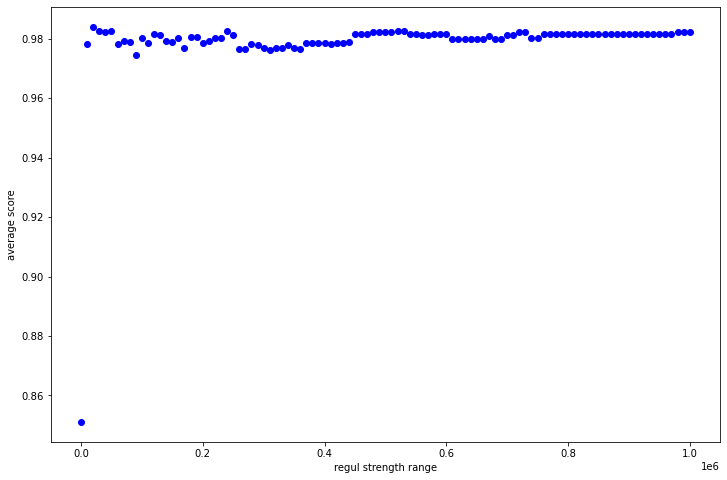

best regul strength: 20000.98
best regul score: 0.9840155945419102


In [522]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

tum_samples = tumour_samples.copy()

# standardise the train set
tum_train_unstd = tum_samples.iloc[:, :-1].to_numpy()
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_samples.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_train_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_samples.insert(loc=len(tum_samples.columns)-1, column='intercept', value=1)

# define the train target values
tum_train_y_obj = tum_samples.iloc[:, -1].values
tum_samples.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_train_y_obj))

regul_range = np.linspace(1, 1e6, num=101)

best_regul_strength, best_regul_score = choose_best_regul_strength(tum_samples.to_numpy(), regul_range)


print(f'best regul strength: {best_regul_strength}')
print(f'best regul score: {best_regul_score}')

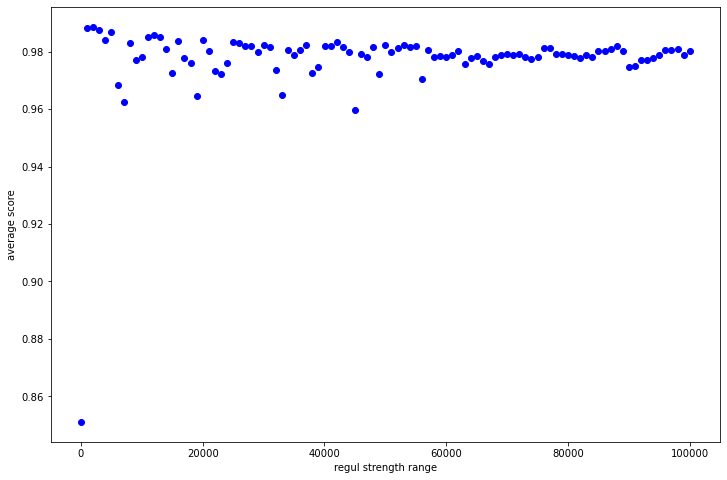

best_regul_strength: 2000.98
best regul score: 0.9886939571150097


In [523]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

tum_samples = tumour_samples.copy()

# standardise the train set
tum_train_unstd = tum_samples.iloc[:, :-1].to_numpy()
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_samples.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_train_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_samples.insert(loc=len(tum_samples.columns)-1, column='intercept', value=1)

# define the train target values
tum_train_y_obj = tum_samples.iloc[:, -1].values
tum_samples.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_train_y_obj))

regul_range = np.linspace(1, 1e5, 101)

best_regul_strength, best_regul_score = choose_best_regul_strength(tum_samples.to_numpy(), regul_range)


print(f'best_regul_strength: {best_regul_strength}')
print(f'best regul score: {best_regul_score}')

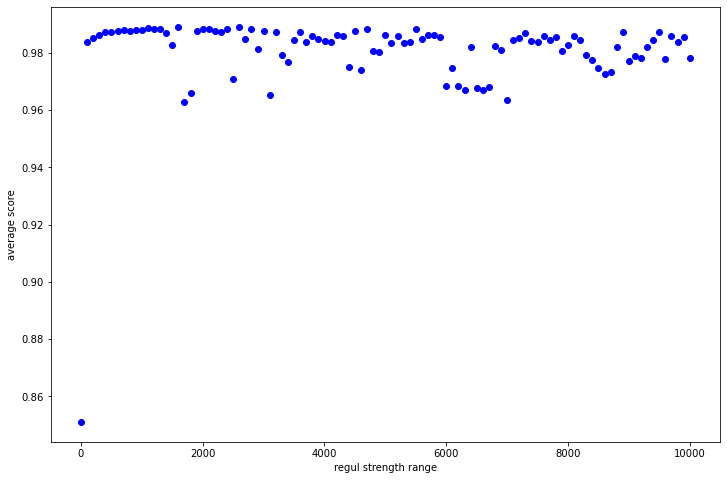

best_regul_strength: 1600.84
best regul score: 0.9890838206627681


In [524]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

tum_samples = tumour_samples.copy()

# standardise the train set
tum_train_unstd = tum_samples.iloc[:, :-1].to_numpy()
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_samples.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_train_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_samples.insert(loc=len(tum_samples.columns)-1, column='intercept', value=1)

# define the train target values
tum_train_y_obj = tum_samples.iloc[:, -1].values
tum_samples.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_train_y_obj))

regul_range = np.linspace(1, 1e4, 101)

best_regul_strength, best_regul_score = choose_best_regul_strength(tum_samples.to_numpy(), regul_range)


print(f'best_regul_strength: {best_regul_strength}')
print(f'best regul score: {best_regul_score}')

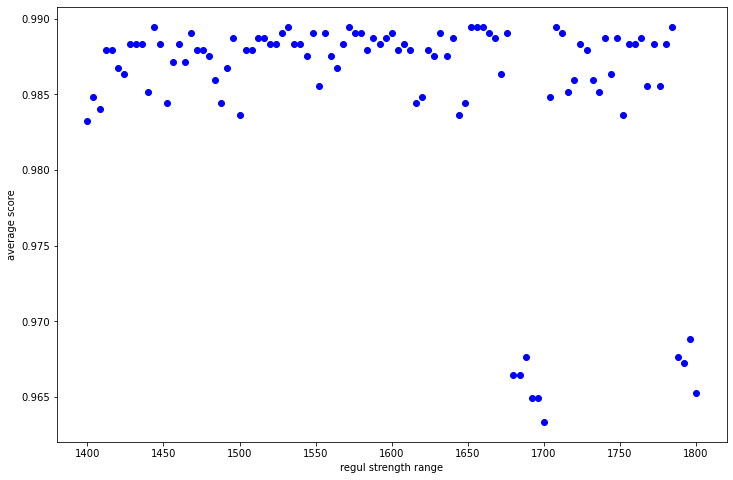

best_regul_strength: 1444.0
best regul score: 0.9894736842105262


In [1204]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

tum_samples = tumour_samples.copy()

# standardise the train set
tum_train_unstd = tum_samples.iloc[:, :-1].to_numpy()
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_samples.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_train_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_samples.insert(loc=len(tum_samples.columns)-1, column='intercept', value=1)

# define the train target values
tum_train_y_obj = tum_samples.iloc[:, -1].values
tum_samples.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_train_y_obj))

regul_range = np.linspace(1.4e3, 1.8e3, 101)

best_regul_strength, best_regul_score = choose_best_regul_strength(tum_samples.to_numpy(), regul_range)

print(f'best_regul_strength: {best_regul_strength}')
print(f'best regul score: {best_regul_score}')

In this last graph I only look at where the optimal sultion was found in the previous graph. This shows that the accuracy has a large noise with similar relularisation strengths, However, one thing to note is that the graph is only between 0.96 and 0.99, and such all relularisation strengths in this range are very well optimised, another thing to note is that multiple points on this graph match the best relularisation strength in score but it is just because I take the first value that they don't get returned as well. 

The limits of high hardness is that it creates a strong hyperplane, which is not lenient with misclassification. This means that whatever side of the hyperplane it lies, that is what it is classified as. However the problem with this is oftentimes you can't perfectly separate the data with a single hyperplane. Some of the data points may lie on one side of the hyperplane but not be in that classification, and such we would want to reduce the hardness. This pramater can adjust our boundary of the hyperplane, allowing us to have violations of the hyperplane but still be classifed correctly. From previous graphs when hardness or regularisation strength was set to 1, we can see that it created a lot lower accuracy, meaning that a very low hardness is not a great prediction of the data. This means that a high hardness for this data set is required for optimal results. This is shown by the consistently very good accuracy results in all the graphs when the regularisation strength is above 1. This indicates that if a model is too soft, then it can start to misclassify values that are in the correct side of the hyperplane. This is obviously not wanted, and shows that a balance between hard and soft margin is needed to achieve optimal results.

I have created many graphs, which include a very high hardness, to show the limit of what a hard svm would produce in this model. As from the first graph, it is still very good being at around 0.98 accuracy. However, I then optimise this to tune in the hardness to a value that includes a bit of deviance to make it as optimal as possible. I record the best regularisation strength each time, and just then search that general range to get a more optimized value, as the variance of each regularisation strength is apprent so want a best score that also has very good scores in the values beside it also.

Finally for my final graph, I found my optimal result, I have aquired a value of 1444 for regularisation strength, and this gives an average score of 0.98947. This is a very good prediction of the data, and such represents a good balance between soft and hard, predicting 99 percent of all the data points, up from 98 percent of all the data points when using the hard model. This means that by optimizing the softnes, I have managed to classify an extra 1 percent on average of the values.

2.3.2

I have evaluated the performance on the test data set. I have plotted ROC curves to show the performance.

In [1185]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

tum_samples = tumour_samples.copy()

# standardise the train set
tum_train_unstd = tum_samples.iloc[:, :-1].to_numpy()
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_samples.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_train_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_samples.insert(loc=len(tum_samples.columns)-1, column='intercept', value=1)

# define the train target values
tum_train_y_obj = tum_samples.iloc[:, -1].to_numpy()
tum_samples.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_train_y_obj))

tum_whole_train = tum_samples.to_numpy()

tum_train = tum_whole_train[:,  :-1] 
tum_train_y = tum_whole_train[:, -1]

# train the model
w = sgd(tum_train, tum_train_y, max_iterations=1025, stop_criterion=0.01, learning_rate=1e-5, regul_strength=best_regul_strength)

train_score = score(w, tum_train, tum_train_y)
print(f'Accuracy on train set: {train_score}')

Accuracy on train set: 0.9914263445050663


In [1186]:
# load data as pandas data frames
tumour_test = pd.read_csv('tumour_test.csv', index_col = 0)

tum_test = tumour_test.copy()

# standardise the train set
tum_test_unstd = tum_test.iloc[:, :-1].to_numpy()
tum_test.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_test_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_test.insert(loc=len(tum_test.columns)-1, column='intercept', value=1)

# define the train target values
tum_test_y_obj = tum_test.iloc[:, -1].to_numpy()
tum_test.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_test_y_obj))

tum_whole_test = tum_test.to_numpy()

tum_tests = tum_whole_test[:,  :-1] 
tum_tests_y = tum_whole_test[:, -1]

test_score = score(w, tum_tests, tum_tests_y)
print(f'Accuracy on test set: {test_score}')

Accuracy on test set: 0.985


When testing the optimal solution found in te previous part on the training data, it returns an accuracy of 0.9899 which is very similar to the average score it got in the first part. This is a very good prediction for the training data, with a 99 percent accuracy. Then i tested it on the test data set, and the accuracy was 0.97. This is a little less than the train data, meaning that the model is slightly overfit to the training data, however is still a very high score, and such is a very good generalisable model.

In [1239]:
def roc_curve(y_true, y_log):
    """
    Arguments:
    y_true: ground truth labels with size (n, )
    y_log: probabilities produced by logistic regression model with size (n, )

    Returns:
    auc: area under the curve (AUC).
    tpr_l: a list of true positive rate (TPR) values for each scanned threshold.
    fpr_l: a list of false positive rate (FPR) values for each scanned threshold.
    thresholds: the scanned thresholds sorted descendingly.
    """
    # List of distinct values in y_log, sorted descendingly.
    thresholds = reversed(sorted(set(y_log))) 
    tpr_l, fpr_l = [], []
    for threshold in thresholds:
        # Apply thresholding
        y_thresholded = y_log >= threshold

        # true positives
        tp = np.sum(y_true & y_thresholded)
        # true negatives
        tn = np.sum((~y_true) & (~y_thresholded))
        # false positives
        fp = np.sum((~y_true) & y_thresholded)
        # false negatives
        fn = np.sum(y_true & (~y_thresholded))

        tpr = tp / (tp + fn)
        fpr = fp / (tn + fp)
        tpr_l.append(tpr)
        fpr_l.append(fpr)

    # Compute AUC using Trapezoidal rule
    auc = np.trapz(tpr_l, fpr_l)
    return auc, tpr_l, fpr_l, thresholds


def logistic(x):
    return 1. / (1. + np.exp(-x))

In [1222]:
def plt_ROC(X_train, y_train, X_test, y_test, regul_range):
    auc = []
    plt.figure(figsize=(12,8))
    plt.title(f"Receiver Operating Curve", size=20)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('TPR', size=20)
    plt.xlabel('FPR', size=20)
    plt.plot([0, 1], [0, 1],'r--')
    
    for regul_strength in regul_range:
        w = sgd(X_train, y_train, max_iterations=1025, stop_criterion=0.01, learning_rate=1e-5, regul_strength=regul_strength)
        y_pred = X_test @ w
        y_log = logistic(y_pred)
        y_true = y_test == 1.0
        aucs, tpr, fpr, thresholds = roc_curve(y_true, y_log)
        auc.append(aucs)
        plt.plot(fpr, tpr, label = f'Regul Stength = {regul_strength}, AUC = {aucs}')
        
    plt.legend(loc = 'lower right')
    plt.show()
    
    best_auc_index = np.argmax(auc)
    best_regul_strength= regul_range[best_auc_index]
    best_regul_auc = auc[best_auc_index]
    return best_regul_strength, best_regul_auc

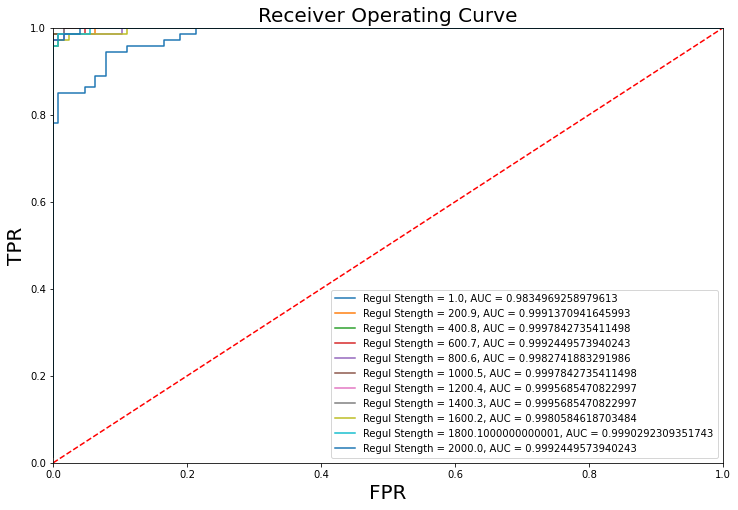

best regul strength: 400.8
best regul auc: 0.9997842735411498


In [1228]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

tum_samples = tumour_samples.copy()

# standardise the train set
tum_train_unstd = tum_samples.iloc[:, :-1].to_numpy()
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_samples.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_train_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_samples.insert(loc=len(tum_samples.columns)-1, column='intercept', value=1)

# define the train target values
tum_train_y_obj = tum_samples.iloc[:, -1].to_numpy()
tum_samples.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_train_y_obj))

tum_whole_train = tum_samples.to_numpy()

tum_train = tum_whole_train[:,  :-1] 
tum_train_y = tum_whole_train[:, -1]

regul_range = np.linspace(1, 2000, 11)

best_regul_strength, best_regul_auc = plt_ROC(tum_train, tum_train_y, tum_tests, tum_tests_y, regul_range)

print(f'best regul strength: {best_regul_strength}')
print(f'best regul auc: {best_regul_auc}')

Implementing an ROC curve using the logistic function, we can use it to show the ROC curver for differing regularisation strengths. I have just plotted 10 curves on the graph using the training data, up to just above the optimal value I found earlier. From the curve I can see that for regularisation strength of 1, it is a lot lower than the others, and is distict as it doesn't cross the other values. However for all the other values it is basically indistiguishable on the graph, as they are all in teh top left corner meaning that they are all almost perfect predictors. It turns out that the best regularisation strength is 400.8, and this produces a auc score of 0.9998 which is very good, given that a score of 1 is the perfect model. However my previously optimal regularisation strength of 1400 also produced a auc score of 0.9996, and such is also an almost perfect model. We can also see that all the auc scores from 200 to 2000 are all approximately 0.999 and such are all very good predictors, and any choice in that range would be appropriate on this scale.

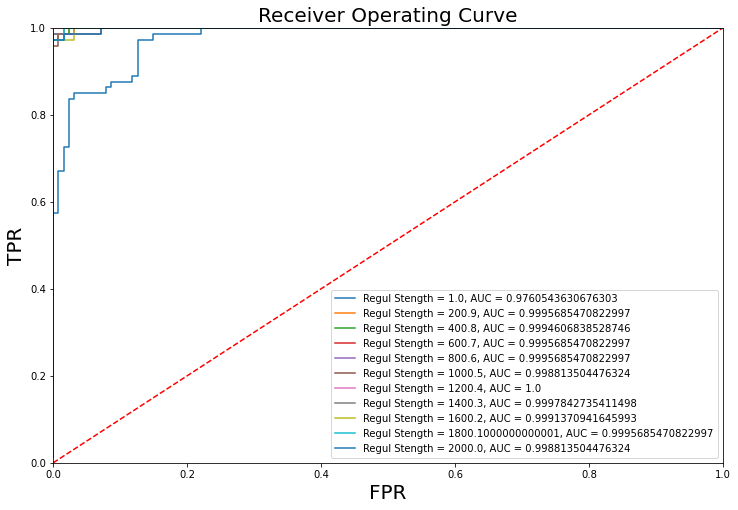

best regul strength: 1200.4
best regul auc: 1.0


In [1227]:
# load data as pandas data frames
tumour_samples = pd.read_csv('tumour_samples.csv', index_col = 0)

tum_samples = tumour_samples.copy()

# standardise the train set
tum_train_unstd = tum_samples.iloc[:, :-1].to_numpy()
mu = train_mu(tum_train_unstd)
sigma = train_sigma(tum_train_unstd)
tum_samples.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_train_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_samples.insert(loc=len(tum_samples.columns)-1, column='intercept', value=1)

# define the train target values
tum_train_y_obj = tum_samples.iloc[:, -1].to_numpy()
tum_samples.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_train_y_obj))

tum_whole_train = tum_samples.to_numpy()

tum_train = tum_whole_train[:,  :-1] 
tum_train_y = tum_whole_train[:, -1]

# load data as pandas data frames
tumour_test = pd.read_csv('tumour_test.csv', index_col = 0)

tum_test = tumour_test.copy()

# standardise the train set
tum_test_unstd = tum_test.iloc[:, :-1].to_numpy()
tum_test.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_test_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_test.insert(loc=len(tum_test.columns)-1, column='intercept', value=1)

# define the train target values
tum_test_y_obj = tum_test.iloc[:, -1].to_numpy()
tum_test.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_test_y_obj))

tum_whole_test = tum_test.to_numpy()

tum_tests = tum_whole_test[:,  :-1] 
tum_tests_y = tum_whole_test[:, -1]

regul_range = np.linspace(1, 2000, 11)

best_regul_strength, best_regul_auc = plt_ROC(tum_train, tum_train_y, tum_tests, tum_tests_y, regul_range)

print(f'best regul strength: {best_regul_strength}')
print(f'best regul auc: {best_regul_auc}')

Implementing the ROC curve on the test data now, I can find that for the unseen test data, the optimal regularisation strength is 1200, and this creates a perfect auc score of 1. This means that it is the perfect model for the test data. This is reassuring because we found earlier than the optimal regularisation strength is 1400 which also produced an auc score of 0.9998. This shows that a regularisation strength of round 1400 is the generalisable strength for the train and the test data, producing very similar results for both. However, it also shows the same as before, in saying that for regularisation strengths from 200 to 2000 they produce an auc score of 0.999.

2.3.3

I have repeated 2.3.1 and 2.3.2 for the new balanced data set.

In [1162]:
# load data as pandas data frames
tumour_bal = pd.read_csv('tumour_samples_bal.csv', index_col = 0)
tumour_bal.head()

,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,n1_fractal_dimension,...,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension,DIAGNOSIS
0,14.530395,20.421653,85.363155,675.768723,0.108968,0.160971,0.177338,0.076638,0.211611,0.071460,...,31.530430,117.452224,995.295094,0.149985,0.361014,0.507859,0.194167,0.364020,0.108554,M
1,15.716418,11.961019,102.643405,676.233715,0.126132,0.156888,0.199903,0.109296,0.202276,0.069605,...,17.016180,118.556593,1073.826428,0.156691,0.391081,0.612940,0.180875,0.302284,0.106598,M
2,21.137170,28.522843,123.110775,1350.096674,0.091688,0.105862,0.168914,0.076865,0.136646,0.053434,...,36.202911,161.032929,1670.209793,0.114542,0.243286,0.404950,0.149961,0.274891,0.082890,M
3,20.985951,21.139095,123.856163,1214.287779,0.102580,0.117669,0.198974,0.098910,0.204487,0.057492,...,28.726188,146.057844,1410.132241,0.120466,0.226293,0.363629,0.183632,0.252874,0.072986,M
4,22.136720,23.129660,137.379083,1304.114821,0.096771,0.147616,0.262871,0.129781,0.216392,0.060031,...,26.846823,172.665832,1815.393844,0.124286,0.361435,0.677388,0.205779,0.311112,0.070464,M


In [1165]:
tumour_bal.dtypes

n1_radius               float64
n1_texture              float64
n1_perimeter            float64
n1_area                 float64
n1_smoothness           float64
n1_compactness          float64
n1_concavity            float64
n1_concave_points       float64
n1_symmetry             float64
n1_fractal_dimension    float64
n2_radius               float64
n2_texture              float64
n2_perimeter            float64
n2_area                 float64
n2_smoothness           float64
n2_compactness          float64
n2_concavity            float64
n2_concave_points       float64
n2_symmetry             float64
n2_fractal_dimension    float64
n3_radius               float64
n3_texture              float64
n3_perimeter            float64
n3_area                 float64
n3_smoothness           float64
n3_compactness          float64
n3_concavity            float64
n3_concave_points       float64
n3_symmetry             float64
n3_fractal_dimension    float64
DIAGNOSIS                object
dtype: o

In [1158]:
tumour_bal.describe()

,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,n1_fractal_dimension,...,n3_radius,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,14.818811,19.749515,96.833648,722.971558,0.097424,0.111662,0.103075,0.056531,0.183448,0.062674,...,17.274790,26.364410,114.212005,997.407518,0.134567,0.279147,0.306335,0.127797,0.296545,0.085125
std,3.759277,4.325306,26.173592,381.920757,0.014220,0.056199,0.083933,0.041686,0.028372,0.007276,...,5.157432,6.188962,36.029057,628.665208,0.023301,0.166508,0.213733,0.068457,0.067876,0.018900
min,6.789684,9.208040,43.779136,105.979607,0.048524,0.013171,0.000290,0.000066,0.106817,0.049237,...,8.270979,11.164656,49.223730,180.154986,0.071072,0.017989,0.000868,0.000226,0.145221,0.049310
25%,12.031928,16.815345,77.818619,448.901728,0.086964,0.068047,0.036098,0.022715,0.164106,0.057548,...,13.374653,21.890191,86.551168,551.781314,0.119096,0.159497,0.138445,0.072097,0.253961,0.072179
50%,14.060986,19.491027,91.161151,609.795678,0.097024,0.102782,0.081177,0.047500,0.180542,0.061321,...,15.816387,26.079342,105.926387,768.043656,0.134656,0.240378,0.280513,0.122057,0.289176,0.081086
75%,17.290196,22.104269,114.842722,949.482386,0.106393,0.141728,0.155105,0.084582,0.199078,0.066566,...,20.776074,30.555654,138.527865,1339.710006,0.148949,0.375844,0.429903,0.179711,0.324496,0.094024
max,28.794695,39.900020,192.696302,2552.249247,0.165639,0.356909,0.442717,0.207216,0.312020,0.097478,...,36.758654,50.012877,253.262332,4180.778744,0.221670,1.077963,1.218038,0.316506,0.679798,0.207772


In [1169]:
tumour_bal.shape

(800, 31)

In [1166]:
tumour_bal['DIAGNOSIS'].unique()

array(['M', 'B'], dtype=object)

In [1168]:
tumour_bal['DIAGNOSIS'].value_counts()

M    400
B    400
Name: DIAGNOSIS, dtype: int64

Analysing this data, I can see that the main differences is that there is a lot less data than before, but also that the data is split evening in terms of diagnosis values. This means that the data is balanced between them, and such should be equally optimised to find a 'B' or an 'M'.

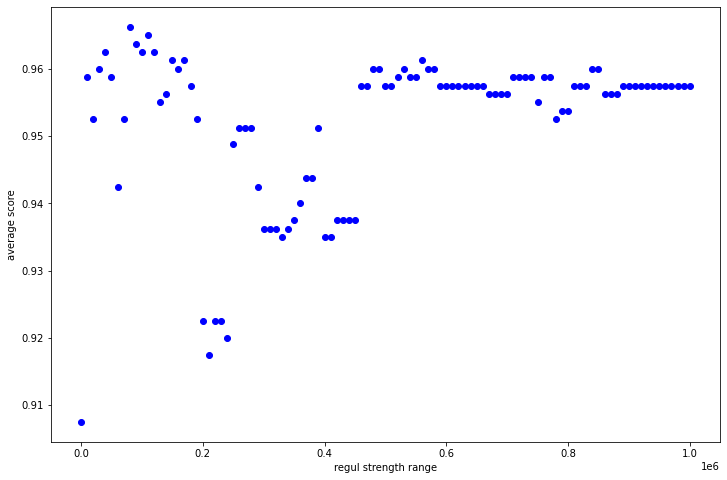

best regul strength: 80000.92
best regul score: 0.9662499999999999


In [720]:
# load data as pandas data frames
tumour_bal = pd.read_csv('tumour_samples_bal.csv', index_col = 0)

tum_bal = tumour_bal.copy()

# standardise the train set
tum_bal_unstd = tum_bal.iloc[:, :-1].to_numpy()
mu = train_mu(tum_bal_unstd)
sigma = train_sigma(tum_bal_unstd)
tum_bal.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_bal_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_bal.insert(loc=len(tum_bal.columns)-1, column='intercept', value=1)

# define the train target values
tum_bal_y_obj = tum_bal.iloc[:, -1].to_numpy()
tum_bal.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_bal_y_obj))

tum_whole_bal = tum_bal.to_numpy()

regul_range = np.linspace(1, 1e6, num=101)

best_regul_strength, best_regul_score = choose_best_regul_strength(tum_whole_bal, regul_range)


print(f'best regul strength: {best_regul_strength}')
print(f'best regul score: {best_regul_score}')

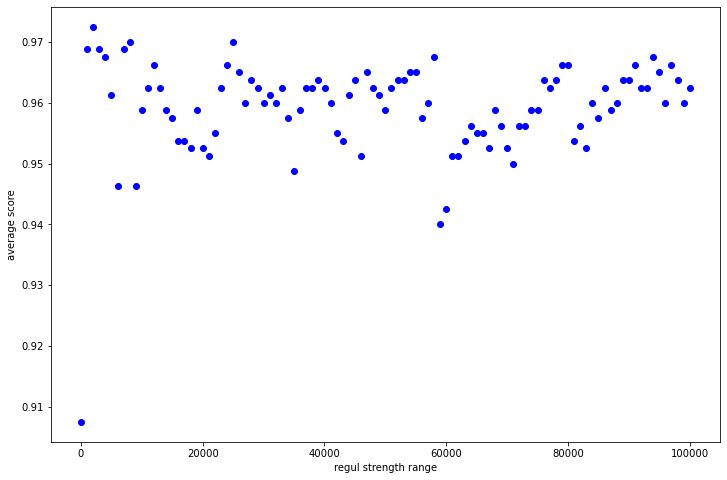

best regul strength: 2000.98
best regul score: 0.9724999999999999


In [721]:
# load data as pandas data frames
tumour_bal = pd.read_csv('tumour_samples_bal.csv', index_col = 0)

tum_bal = tumour_bal.copy()

# standardise the train set
tum_bal_unstd = tum_bal.iloc[:, :-1].to_numpy()
mu = train_mu(tum_bal_unstd)
sigma = train_sigma(tum_bal_unstd)
tum_bal.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_bal_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_bal.insert(loc=len(tum_bal.columns)-1, column='intercept', value=1)

# define the train target values
tum_bal_y_obj = tum_bal.iloc[:, -1].to_numpy()
tum_bal.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_bal_y_obj))

tum_whole_bal = tum_bal.to_numpy()

regul_range = np.linspace(1, 1e5, num=101)

best_regul_strength, best_regul_score = choose_best_regul_strength(tum_whole_bal, regul_range)


print(f'best regul strength: {best_regul_strength}')
print(f'best regul score: {best_regul_score}')

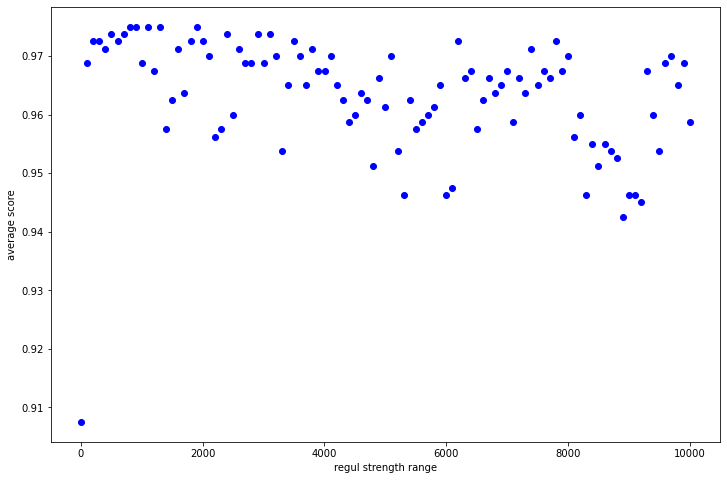

best regul strength: 800.92
best regul score: 0.975


In [1231]:
# load data as pandas data frames
tumour_bal = pd.read_csv('tumour_samples_bal.csv', index_col = 0)

tum_bal = tumour_bal.copy()

# standardise the train set
tum_bal_unstd = tum_bal.iloc[:, :-1].to_numpy()
mu = train_mu(tum_bal_unstd)
sigma = train_sigma(tum_bal_unstd)
tum_bal.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_bal_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_bal.insert(loc=len(tum_bal.columns)-1, column='intercept', value=1)

# define the train target values
tum_bal_y_obj = tum_bal.iloc[:, -1].to_numpy()
tum_bal.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_bal_y_obj))

tum_whole_bal = tum_bal.to_numpy()

regul_range = np.linspace(1, 1e4, num=101)

best_regul_strength, best_regul_score = choose_best_regul_strength(tum_whole_bal, regul_range)


print(f'best regul strength: {best_regul_strength}')
print(f'best regul score: {best_regul_score}')

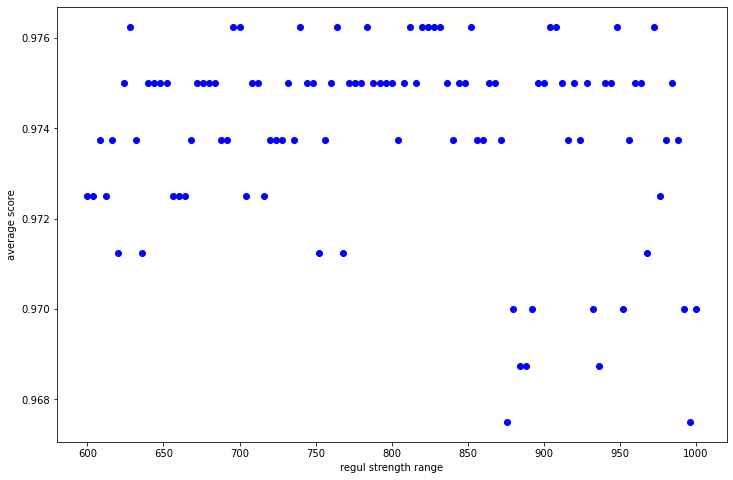

best regul strength: 628.0
best regul score: 0.9762500000000001


In [724]:
# load data as pandas data frames
tumour_bal = pd.read_csv('tumour_samples_bal.csv', index_col = 0)

tum_bal = tumour_bal.copy()

# standardise the train set
tum_bal_unstd = tum_bal.iloc[:, :-1].to_numpy()
mu = train_mu(tum_bal_unstd)
sigma = train_sigma(tum_bal_unstd)
tum_bal.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_bal_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_bal.insert(loc=len(tum_bal.columns)-1, column='intercept', value=1)

# define the train target values
tum_bal_y_obj = tum_bal.iloc[:, -1].to_numpy()
tum_bal.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_bal_y_obj))

tum_whole_bal = tum_bal.to_numpy()

regul_range = np.linspace(600, 1000, num=101)

best_regul_strength, best_regul_score = choose_best_regul_strength(tum_whole_bal, regul_range)


print(f'best regul strength: {best_regul_strength}')
print(f'best regul score: {best_regul_score}')

Repeating the same graphs as before, I notice that there is a larger variance in score for a range of regularisation strengths. However, I would put this down to the number of data points we are working with this time. We only have 800 training points this time compared to 2500 before. This means that our model has a lot less data to work with and would assume a slightly worse fit. However, given that now the data points are balanced, it should be able to give a better fit to the true values that should be 'M'.

From this final graph it has found an optimal solution of 628, which is a lot less than previous optimal solution for the unbalanced data. This optimal solution comes with a best score of 0.976, which for the decrease in data points, is a very good score. However compared to previously it is a lot less when compared it the training data, but to know if it is a better model than previously, we will need to test it on the test data and see what score it gives.

In [725]:
# load data as pandas data frames
tumour_bal = pd.read_csv('tumour_samples_bal.csv', index_col = 0)

tum_bal = tumour_bal.copy()

# standardise the train set
tum_bal_unstd = tum_bal.iloc[:, :-1].to_numpy()
mu = train_mu(tum_bal_unstd)
sigma = train_sigma(tum_bal_unstd)
tum_bal.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_bal_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_bal.insert(loc=len(tum_bal.columns)-1, column='intercept', value=1)

# define the train target values
tum_bal_y_obj = tum_bal.iloc[:, -1].to_numpy()
tum_bal.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_bal_y_obj))

tum_whole_bal = tum_bal.to_numpy()

tum_bal = tum_whole_bal[:,  :-1] 
tum_bal_y = tum_whole_bal[:, -1]

# train the model
w = sgd(tum_bal, tum_bal_y, max_iterations=1025, stop_criterion=0.01, learning_rate=1e-5, regul_strength=best_regul_strength)

train_score = score(w, tum_bal, tum_bal_y)
print(f'Accuracy on balanced train set: {train_score}')

Accuracy on balanced train set: 0.97375


In [726]:
# load data as pandas data frames
tumour_test = pd.read_csv('tumour_test.csv', index_col = 0)

tum_test = tumour_test.copy()

# standardise the train set
tum_test_unstd = tum_test.iloc[:, :-1].to_numpy()
tum_test.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_test_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_test.insert(loc=len(tum_test.columns)-1, column='intercept', value=1)

# define the train target values
tum_test_y_obj = tum_test.iloc[:, -1].to_numpy()
tum_test.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_test_y_obj))

tum_whole_test = tum_test.to_numpy()

tum_tests = tum_whole_test[:,  :-1] 
tum_tests_y = tum_whole_test[:, -1]

test_score = score(w, tum_tests, tum_tests_y)
print(f'Accuracy on test set: {test_score}')

Accuracy on test set: 0.985


When comparing the optimal solution to the whole training data, it scores very similarly to the average score before, which means that it is a very good fit for the training data. However, when used on the test data set, it has an accuracy of 0.985. This is higher than that of the previous model, which scored just 0.97, showing the importance of balanced data. This means that even with a lot less data points, our model now is a lot more generalisable if it is trained on a balanced data set. For tghis instance, when using a balanced data set, you get a softer regularisation strength and such, the model is a lot more lenient on values. By the accuracy of both tests, it shows that this is a more optimal solution.

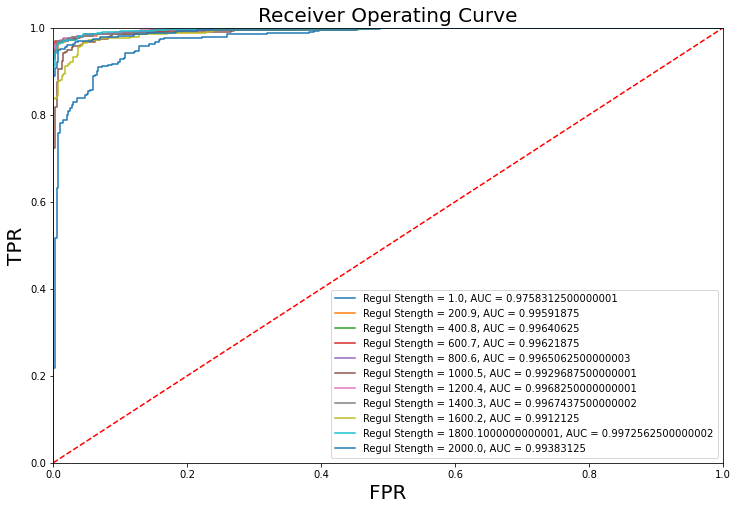

best regul strength: 1800.1000000000001
best regul auc: 0.9972562500000002


In [1235]:
# load data as pandas data frames
tumour_bal = pd.read_csv('tumour_samples_bal.csv', index_col = 0)

tum_bal = tumour_bal.copy()

# standardise the train set
tum_bal_unstd = tum_bal.iloc[:, :-1].to_numpy()
mu = train_mu(tum_bal_unstd)
sigma = train_sigma(tum_bal_unstd)
tum_bal.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_bal_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_bal.insert(loc=len(tum_bal.columns)-1, column='intercept', value=1)

# define the train target values
tum_bal_y_obj = tum_bal.iloc[:, -1].to_numpy()
tum_bal.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_bal_y_obj))

tum_whole_bal = tum_bal.to_numpy()

tum_bal = tum_whole_bal[:,  :-1] 
tum_bal_y = tum_whole_bal[:, -1]

regul_range = np.linspace(1, 2000, 11)

best_regul_strength, best_regul_auc = plt_ROC(tum_bal, tum_bal_y, tum_bal, tum_bal_y, regul_range)

print(f'best regul strength: {best_regul_strength}')
print(f'best regul auc: {best_regul_auc}')

When creating the same ROC as the previous part, apart from this time it trains it with te balanced data set, it produces a best regularisation strength of 1800, which gives 0.997 auc score. First difference I see is that te optimal strength in this graph is higher than that for the previous part, where it found 400 for the training data. This would be because the data is now balanced and such can produce a better generalised optimal regularisation strength. However, anothee difference is that the optimal solution found before was a lot less than this value found at 628. However, when looking at the actual values, all the values from 200 to 2000 produce a similar auc score of 0.99. However that is where the next differences comes in, and is that all the auc scores for this model, are less than that for the other training set. This could be because of the number of data points being a lot less, and also because it is balanced, it doesn't have more 'B' values and such is a better predictor of the actual correctly scored 'B' values, instead of previously when the majority were 'B' and such would be easier for the model to predict 'B'.

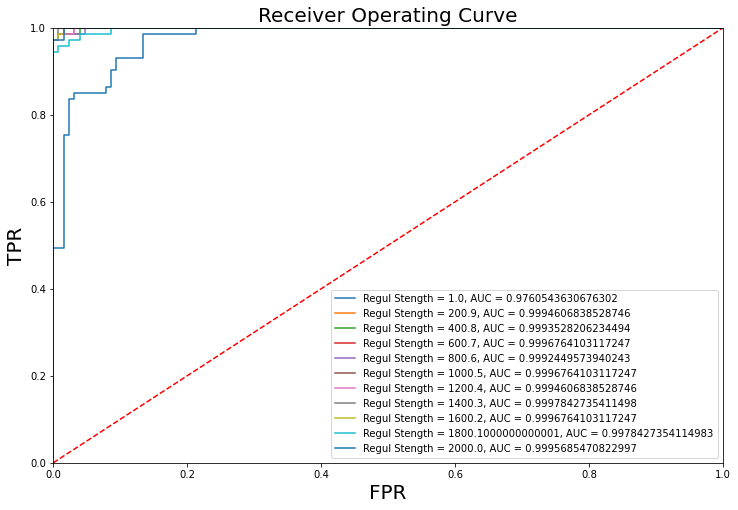

best regul strength: 1400.3
best regul auc: 0.9997842735411498


In [1236]:
# load data as pandas data frames
tumour_bal = pd.read_csv('tumour_samples_bal.csv', index_col = 0)

tum_bal = tumour_bal.copy()

# standardise the train set
tum_bal_unstd = tum_bal.iloc[:, :-1].to_numpy()
mu = train_mu(tum_bal_unstd)
sigma = train_sigma(tum_bal_unstd)
tum_bal.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_bal_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_bal.insert(loc=len(tum_bal.columns)-1, column='intercept', value=1)

# define the train target values
tum_bal_y_obj = tum_bal.iloc[:, -1].to_numpy()
tum_bal.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_bal_y_obj))

tum_whole_bal = tum_bal.to_numpy()

tum_bal = tum_whole_bal[:,  :-1] 
tum_bal_y = tum_whole_bal[:, -1]

# load data as pandas data frames
tumour_test = pd.read_csv('tumour_test.csv', index_col = 0)

tum_test = tumour_test.copy()

# standardise the train set
tum_test_unstd = tum_test.iloc[:, :-1].to_numpy()
tum_test.iloc[:, :-1] = pd.DataFrame(standardise_train(tum_test_unstd, mu, sigma))

# insert 1 in every row for intercept b
tum_test.insert(loc=len(tum_test.columns)-1, column='intercept', value=1)

# define the train target values
tum_test_y_obj = tum_test.iloc[:, -1].to_numpy()
tum_test.iloc[:, -1] = pd.Series(object_to_int_conversion_svm(tum_test_y_obj))

tum_whole_test = tum_test.to_numpy()

tum_tests = tum_whole_test[:,  :-1] 
tum_tests_y = tum_whole_test[:, -1]

regul_range = np.linspace(1, 2000, 11)

best_regul_strength, best_regul_auc = plt_ROC(tum_bal, tum_bal_y, tum_tests, tum_tests_y, regul_range)

print(f'best regul strength: {best_regul_strength}')
print(f'best regul auc: {best_regul_auc}')

By analysing the ROC curve, it returns an optimal solution of 1400, which is also lower than that of the previous part of 1800, which I have included in the graph also. First thing i notice, is that all the auc scores are a lot better than against the balanced training set. This will most likely be because the test set is also unbalaced and such is easier for it to get a better auc score. But the other thing i notice, is that the optimal solution 1400, is very similar to the optimal value in the balanced auc score of 1800, and such shows that a balanced data set is a lot more constent over both than an unbalanced data set, like in the previous part where the difference between the two optimal solutions was very vast, 400 to 1200. However, one thing that isn't so good, is that the optimal score for this graph, isn't quite the same as te optimal value found earlier through cross validation of 628. But when looking at the actual auc scores, from 200 to 2000 excluding 1800 all produce auc scores of 0.999. This means that 628 is still a very valid optimal parameter. However when comparing the best auc scores, the previous part managed to get a perfect score, which this balanced set wasn't able to do.